In [5]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
local_dir = '/content/drive/MyDrive/Acid Analysis/'

Mounted at /content/drive


In [6]:
!pip install --quiet umap-learn

In [7]:
import pandas as pd
import seaborn as sns
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
from scipy import stats
from matplotlib_venn import venn2, venn3
from tqdm.auto import tqdm

pd.options.mode.chained_assignment = None

In [8]:
group_cols = ['Treatment']

* reduce decimals on fc yes
* Fix grid yes
* fix axis on volcano yes
* remove clustermap axis yes

* full data set results spreadsheet
* pictures in a powerpoint
* original kinexus data and extras (network, antibodies)
* go term use sig vs non sig enrichment


add this
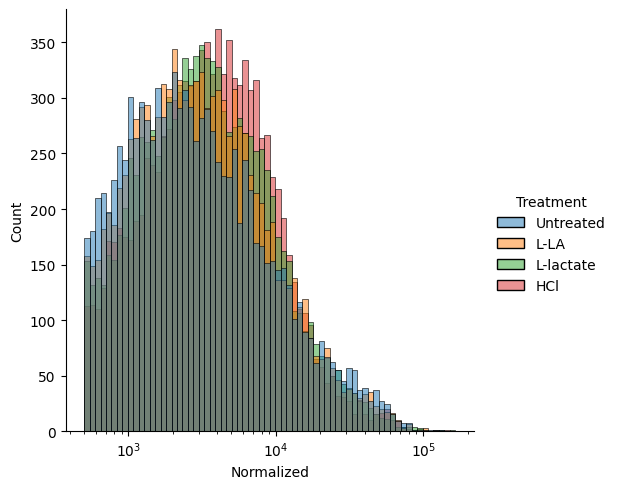
<hr>

* fold change y axis (all antibodies, good ones). x axis comparisons
https://davidbaranger.files.wordpress.com/2021/01/blog_3_last.png?w=1088

* scatterplot (volcano)
* venn diagram of significance
* heatmap
* dimension reduction (not for full data, maybe works per antibody? groupby condiyion)
* mappings (full everything ofc)
* go-analysis (significant cull)
* linear regression of variables and phospho, i.e. which signals are most correlated with time/ other variable?
* filter on timepoint.

# 1. Import Data Format
Data id columns:

`antibody` `replicate` `Flag` `Normalized`
<br><br>
Everything else can be grouped on to determine categories

In [9]:
melted = pd.read_csv(local_dir + 'melted.csv')
melted

Sample ID  Treatment Treatment Details  Barcode antibody  replicate  \
0         BJ_01  Untreated   Untreated rep 1    21403   05-184          0   
1         BJ_01  Untreated   Untreated rep 1    21403   05-184          1   
2         BJ_01  Untreated   Untreated rep 1    21403   05-746          0   
3         BJ_01  Untreated   Untreated rep 1    21403   05-746          1   
4         BJ_01  Untreated   Untreated rep 1    21403  06-2020          0   
...         ...        ...               ...      ...      ...        ...   
48643     BJ_12        HCl         HCl rep 3    21414  sc-9898          1   
48644     BJ_12        HCl         HCl rep 3    21414  sc-9968          0   
48645     BJ_12        HCl         HCl rep 3    21414  sc-9968          1   
48646     BJ_12        HCl         HCl rep 3    21414  sc-9970          0   
48647     BJ_12        HCl         HCl rep 3    21414  sc-9970          1   

       Flag  Normalized  
0         1         313  
1         1         273  
2         0         799  
3         0         762  
4         0        1566  
...     ...         ...  
48643     0         457  
48644     1         170  
48645     1         188  
48646     0         180  
48647     0         322  

[48648 rows x 8 columns]

In [10]:
antibody_to_uniprot = pd.read_csv(local_dir + 'antibody revised.csv')
antibody_to_uniprot

Antibody Code Antibody Name                  Target Name  \
0     05-0073 (Clone 8F7)           NaN                   FAK (PTK2)   
1                  05-184           NaN                          Src   
2                  05-636           NaN  H2AFX (H2AX; Histone H2A.X)   
3                  05-746           NaN                   Histone H3   
4                 06-0020           NaN                  Akt1 (PKBa)   
...                   ...           ...                          ...   
3785               sc-960           NaN          MKK3 (MAP2K3; MEK3)   
3786               sc-964           NaN          MKK4 (MAP2K4; MEK4)   
3787              sc-9898           NaN                          Csk   
3788              sc-9968           NaN      CDKN2A (p16; p16-INK4a)   
3789              sc-9970           NaN    Integrin b1 (ITGB1; CD29)   

     Pan or P-Site Antibody Type Target Full Name Target Uniprot ID  \
0             Y397           NaN              NaN            Q05397   
1     Pan-specific           NaN              NaN            P12931   
2             S139           NaN              NaN            P16104   
3               T3           NaN              NaN            P84243   
4              NaN           NaN              NaN            P31749   
...            ...           ...              ...               ...   
3785  Pan-specific           NaN              NaN            P46734   
3786  Pan-specific           NaN              NaN            P45985   
3787  Pan-specific           NaN              NaN            P41240   
3788  Pan-specific           NaN              NaN            Q8N726   
3789  Pan-specific           NaN              NaN            P05556   

     Target Refseq ID  
0                 NaN  
1                 NaN  
2                 NaN  
3                 NaN  
4                 NaN  
...               ...  
3785              NaN  
3786              NaN  
3787              NaN  
3788              NaN  
3789              NaN  

[3790 rows x 8 columns]

# 3. Filter out Pan Specific Signals

In [11]:
antibody_to_uniprot

Antibody Code Antibody Name                  Target Name  \
0     05-0073 (Clone 8F7)           NaN                   FAK (PTK2)   
1                  05-184           NaN                          Src   
2                  05-636           NaN  H2AFX (H2AX; Histone H2A.X)   
3                  05-746           NaN                   Histone H3   
4                 06-0020           NaN                  Akt1 (PKBa)   
...                   ...           ...                          ...   
3785               sc-960           NaN          MKK3 (MAP2K3; MEK3)   
3786               sc-964           NaN          MKK4 (MAP2K4; MEK4)   
3787              sc-9898           NaN                          Csk   
3788              sc-9968           NaN      CDKN2A (p16; p16-INK4a)   
3789              sc-9970           NaN    Integrin b1 (ITGB1; CD29)   

     Pan or P-Site Antibody Type Target Full Name Target Uniprot ID  \
0             Y397           NaN              NaN            Q05397   
1     Pan-specific           NaN              NaN            P12931   
2             S139           NaN              NaN            P16104   
3               T3           NaN              NaN            P84243   
4              NaN           NaN              NaN            P31749   
...            ...           ...              ...               ...   
3785  Pan-specific           NaN              NaN            P46734   
3786  Pan-specific           NaN              NaN            P45985   
3787  Pan-specific           NaN              NaN            P41240   
3788  Pan-specific           NaN              NaN            Q8N726   
3789  Pan-specific           NaN              NaN            P05556   

     Target Refseq ID  
0                 NaN  
1                 NaN  
2                 NaN  
3                 NaN  
4                 NaN  
...               ...  
3785              NaN  
3786              NaN  
3787              NaN  
3788              NaN  
3789              NaN  

[3790 rows x 8 columns]

In [12]:
antibody_to_uniprot_mergeable = antibody_to_uniprot[['Antibody Code', 'Target Name', 'Target Uniprot ID', 'Pan or P-Site']]
merged = pd.merge(melted, antibody_to_uniprot_mergeable, left_on='antibody', right_on='Antibody Code', how='left').drop(columns=['Antibody Code'])
merged

Sample ID  Treatment Treatment Details  Barcode antibody  replicate  \
0         BJ_01  Untreated   Untreated rep 1    21403   05-184          0   
1         BJ_01  Untreated   Untreated rep 1    21403   05-184          1   
2         BJ_01  Untreated   Untreated rep 1    21403   05-746          0   
3         BJ_01  Untreated   Untreated rep 1    21403   05-746          1   
4         BJ_01  Untreated   Untreated rep 1    21403  06-2020          0   
...         ...        ...               ...      ...      ...        ...   
48643     BJ_12        HCl         HCl rep 3    21414  sc-9898          1   
48644     BJ_12        HCl         HCl rep 3    21414  sc-9968          0   
48645     BJ_12        HCl         HCl rep 3    21414  sc-9968          1   
48646     BJ_12        HCl         HCl rep 3    21414  sc-9970          0   
48647     BJ_12        HCl         HCl rep 3    21414  sc-9970          1   

       Flag  Normalized                Target Name Target Uniprot ID  \
0         1         313                        Src            P12931   
1         1         273                        Src            P12931   
2         0         799                 Histone H3            P84243   
3         0         762                 Histone H3            P84243   
4         0        1566                Akt1 (PKBa)               NaN   
...     ...         ...                        ...               ...   
48643     0         457                        Csk            P41240   
48644     1         170    CDKN2A (p16; p16-INK4a)            Q8N726   
48645     1         188    CDKN2A (p16; p16-INK4a)            Q8N726   
48646     0         180  Integrin b1 (ITGB1; CD29)            P05556   
48647     0         322  Integrin b1 (ITGB1; CD29)            P05556   

      Pan or P-Site  
0      Pan-specific  
1      Pan-specific  
2                T3  
3                T3  
4              Y474  
...             ...  
48643  Pan-specific  
48644  Pan-specific  
48645  Pan-specific  
48646  Pan-specific  
48647  Pan-specific  

[48648 rows x 11 columns]

In [13]:
merged[merged[['Target Name', 'Target Uniprot ID',	'Pan or P-Site']].isna().any(axis=1)]['antibody'].value_counts()

06-2020          24
H00004254-MOI    24
NK001-4          24
NK129-4          24
NK155-6          24
Name: antibody, dtype: int64

In [14]:
merged[merged[['Target Name', 'Target Uniprot ID',	'Pan or P-Site']].isna().any(axis=1)]

Sample ID  Treatment Treatment Details  Barcode       antibody  \
4         BJ_01  Untreated   Untreated rep 1    21403        06-2020   
5         BJ_01  Untreated   Untreated rep 1    21403        06-2020   
394       BJ_01  Untreated   Untreated rep 1    21403  H00004254-MOI   
395       BJ_01  Untreated   Untreated rep 1    21403  H00004254-MOI   
428       BJ_01  Untreated   Untreated rep 1    21403        NK001-4   
...         ...        ...               ...      ...            ...   
45023     BJ_12        HCl         HCl rep 3    21414        NK001-4   
45308     BJ_12        HCl         HCl rep 3    21414        NK129-4   
45309     BJ_12        HCl         HCl rep 3    21414        NK129-4   
45338     BJ_12        HCl         HCl rep 3    21414        NK155-6   
45339     BJ_12        HCl         HCl rep 3    21414        NK155-6   

       replicate  Flag  Normalized       Target Name Target Uniprot ID  \
4              0     0        1566       Akt1 (PKBa)               NaN   
5              1     0        1702       Akt1 (PKBa)               NaN   
394            0     0         451  SFC (Kit Ligand)               NaN   
395            1     0         684  SFC (Kit Ligand)               NaN   
428            0     0        6294            Abl1-3               NaN   
...          ...   ...         ...               ...               ...   
45023          1     0        3353            Abl1-3               NaN   
45308          0     0        1170            Akt1-2               NaN   
45309          1     0         962            Akt1-2               NaN   
45338          0     0        1189            Raf1-2               NaN   
45339          1     0        1041            Raf1-2               NaN   

      Pan or P-Site  
4              Y474  
5              Y474  
394    Pan-specific  
395    Pan-specific  
428    Pan-specific  
...             ...  
45023  Pan-specific  
45308  Pan-specific  
45309  Pan-specific  
45338  Pan-specific  
45339  Pan-specific  

[120 rows x 11 columns]

In [15]:
merged['Title'] = merged['Target Name'] + ' ' + merged['Pan or P-Site']

In [16]:
merged['isPan'] = merged['Pan or P-Site'].str.lower().str.contains('pan')

In [17]:
melted_original = merged.copy(deep=True)
melted_original = melted_original[melted_original['Flag'] == 0]

# 2. Filter bad rows
TODO make this more intelligent

In [18]:
# Bad flag, comes from the chip reader
merged = merged[merged['Flag'] == 0]

In [19]:
# Low value. TODO I (Finn) don't understand this.
merged = merged[merged['Normalized'] > 500]

In [20]:
# merged = merged[~merged['isPan']]

# 4. Volcano Plots


In [21]:
# Split by category
groups = {i:G for i, G in merged.groupby(group_cols)}

# Use only the antibodies common across all groups
# Assert at least 3 normalized values (to be able to take a median, therefore most statistical tests)
valid_antibodies = [set(group['antibody'].value_counts()[group['antibody'].value_counts() >= 3].index) for group in groups.values()]
intersecting_antibodies = set.intersection(*valid_antibodies)
groups = {i:G[G['antibody'].isin(intersecting_antibodies)] for i, G in groups.items()}

max_len = max([len(str(x)) for x in groups.keys()])
for i, G in groups.items():
  print(f'{str(i):{max_len}} {len(G):<10}')

HCl       9538      
L-LA      9501      
L-lactate 9533      
Untreated 9318      


<ipython-input-21-b0c794ba3984>:2: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  groups = {i:G for i, G in merged.groupby(group_cols)}


In [22]:
from itertools import combinations
def make_fc_antibody(G, exp):
  #extract from original row
  exp = exp[exp['antibody'] == G.iloc[0]['antibody']]
  exp_vals = exp['Normalized']
  first = exp.drop(columns=['replicate', 'Flag', 'Normalized']).iloc[0]
  G_vals = G['Normalized']

  #calculate
  first['log2fc'] = np.log2(exp_vals.mean()/G_vals.mean())
  first['pval'] = stats.ttest_ind(exp_vals, G_vals, equal_var=False)[1]
  first['N_base'] = len(exp_vals)
  first['N_exp'] = len(G_vals)
  return first

def make_fc(base, exp):
  compared = base.groupby('antibody').apply(make_fc_antibody, exp).reset_index(drop=True)
  compared = compared[['antibody',	'Target Name',	'Target Uniprot ID',	'Pan or P-Site',	'log2fc',	'pval',	'N_base',	'N_exp']]
  # compared['isPan'] = compared['Pan or P-Site'].str.lower().str.contains('pan')
  compared['significant'] = (compared['log2fc'].abs() > 1) & (compared['pval'].abs() < 0.05)
  return compared

combination_keys = list(tuple(x) for x in combinations(groups.keys(), 2))
combination_keys = [tuple(sorted(key, reverse=True)) for key in combination_keys] # Put untreated in the front

comparisons = {key_pair:make_fc(groups[list(key_pair)[0]], groups[list(key_pair)[1]]) for key_pair in tqdm(combination_keys)}

# Flip the fc to make all comparisons, so its totally populated.
symmetric_comparisons = {}
for key_pair, df in comparisons.items():
  new_key_pair = (key_pair[1], key_pair[0])
  df = df.copy(deep=True)
  df['log2fc'] = -df['log2fc']
  symmetric_comparisons[new_key_pair] = df

comparisons.update(symmetric_comparisons)

  0%|          | 0/6 [00:00<?, ?it/s]

In [23]:
# Split by category
groups_unfiltered = {i:G for i, G in melted_original.groupby(group_cols)}

# Use only the antibodies common across all groups
# Assert at least 3 normalized values (to be able to take a median, therefore most statistical tests)
valid_antibodies = [set(group['antibody'].value_counts()[group['antibody'].value_counts() >= 3].index) for group in groups_unfiltered.values()]
intersecting_antibodies = set.intersection(*valid_antibodies)
groups_unfiltered = {i:G[G['antibody'].isin(intersecting_antibodies)] for i, G in groups_unfiltered.items()}

max_len = max([len(str(x)) for x in groups_unfiltered.keys()])
for i, G in groups_unfiltered.items():
  print(f'{str(i):{max_len}} {len(G):<10}')

HCl       11253     
L-LA      11214     
L-lactate 11253     
Untreated 11214     


<ipython-input-23-79f960d62fb9>:2: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  groups_unfiltered = {i:G for i, G in melted_original.groupby(group_cols)}


In [24]:
from itertools import combinations
def make_fc_antibody(G, exp):
  #extract from original row
  exp = exp[exp['antibody'] == G.iloc[0]['antibody']]
  exp_vals = exp['Normalized']
  first = exp.drop(columns=['replicate', 'Normalized']).iloc[0]
  G_vals = G['Normalized']

  #calculate
  first['log2fc'] = np.log2(exp_vals.mean()/G_vals.mean())
  first['pval'] = stats.ttest_ind(exp_vals, G_vals, equal_var=False)[1]
  first['N_base'] = len(exp_vals)
  first['N_exp'] = len(G_vals)
  return first

def make_fc(base, exp):
  compared = base.groupby('antibody').apply(make_fc_antibody, exp).reset_index(drop=True)
  compared = compared[['antibody',	'Target Name',	'Target Uniprot ID',	'Pan or P-Site',	'log2fc',	'pval',	'N_base',	'N_exp']]
  # compared['isPan'] = compared['Pan or P-Site'].str.lower().str.contains('pan')
  compared['significant'] = (compared['log2fc'].abs() > 1) & (compared['pval'].abs() < 0.05)
  return compared

combination_keys = list(tuple(x) for x in combinations(groups_unfiltered.keys(), 2))
combination_keys = [tuple(sorted(key, reverse=True)) for key in combination_keys] # Put untreated in the front

comparisons_unfiltered = {key_pair:make_fc(groups_unfiltered[list(key_pair)[0]], groups_unfiltered[list(key_pair)[1]]) for key_pair in tqdm(combination_keys)}

# Flip the fc to make all comparisons, so its totally populated.
symmetric_comparisons_unfiltered = {}
for key_pair, df in comparisons_unfiltered.items():
  new_key_pair = (key_pair[1], key_pair[0])
  df = df.copy(deep=True)
  df['log2fc'] = -df['log2fc']
  symmetric_comparisons_unfiltered[new_key_pair] = df

comparisons_unfiltered.update(symmetric_comparisons_unfiltered)

  0%|          | 0/6 [00:00<?, ?it/s]

In [25]:
def comparison_volcano(key_a, key_b):
  comp = comparisons[(key_a, key_b)]
  # comp = comp[~comp['isPan']]
  fig = px.scatter(comp, x='log2fc', y='pval', hover_data=comp.columns, color='significant', log_y=True, title=f'{key_a} vs. {key_b}')
  fig.update_yaxes(autorange="reversed", exponentformat='E')
  return fig

comparison_volcano('Untreated', 'L-lactate')

In [26]:
max_fc = max(df['log2fc'].max() for df in comparisons.values())
min_fc = min(df['log2fc'].min() for df in comparisons.values())
max_pval = max(df['pval'].max() for df in comparisons.values())
min_pval = min(df['pval'].min() for df in comparisons.values())

# Create a subplot grid
n = len(groups)

fig, axes = plt.subplots(n, n, figsize=(14, 14), dpi=300)
fig.suptitle("Pairwise Volcano Plot including Pan Specific Signals")

fig.text(0.5, -0.02, 'Experimental Treatment', ha='center', va='center', fontsize=16, weight="bold")
fig.text(-0.02, 0.5, 'Base Treatment', ha='center', va='center', rotation='vertical', fontsize=16, weight="bold")


axes = axes.flatten()

# Iterate through the dictionary and plot the data
for row, key_a in enumerate(groups.keys()):
  for col, key_b in enumerate(groups.keys()):
      name_a = key_a
      name_b = key_b
      ax = axes[row*n + col]

      # JACK skip diagonal
      if key_a == key_b:
        pass
        # df = groups[key_a]
        # sns.histplot(df['Normalized'], ax=ax)
      else:
        df = comparisons[(key_a, key_b)]
        # df = df[~df['isPan']]
        fig = sns.scatterplot(data=df, x='log2fc', y='pval', ax=ax, hue='significant', legend=False, s=5, alpha=0.5)
        fig.text(0.9, 0.9, f"{df['significant'].sum()} sig", ha='right', va='center', transform=ax.transAxes, fontsize=10)
        ax.set_xlim(min_fc, max_fc)
        ax.set_ylim(min_pval, max_pval)
        ax.set_yscale('log')
        ax.invert_yaxis()
        ax.axhline(y=0.05, color='gray', linestyle='--', linewidth=0.5)
        ax.axvline(x=1, color='gray', linestyle='--', linewidth=0.5)
        ax.axvline(x=-1, color='gray', linestyle='--', linewidth=0.5)

      ax.grid(False)
      ax.set_xlabel(None)
      ax.set_ylabel(None)

      if col == 0:
        ax.set_ylabel(name_a+'\n\nP-Value')
        ax.yaxis.set_label_coords(-0.17, 0.5)  # Adjust the label position
      else:
        ax.set_yticklabels([])

      if row == n - 1:
        ax.set_xlabel('log2FC\n\n'+name_b)
        ax.xaxis.set_label_coords(0.5, -0.14)
      else:
        ax.set_xticklabels([])

# Adjust subplot spacing
plt.tight_layout()

# Show the plot
plt.show()

Output hidden; open in https://colab.research.google.com to view.

antibody  Target Name Target Uniprot ID Pan or P-Site    log2fc      pval  \
0   05-746   Histone H3            P84243            T3  0.006979  0.980142   
1  06-2020  Akt1 (PKBa)               NaN          Y474 -0.069587  0.820285   

   N_base  N_exp  significant             Title  outlier  
0       5      6        False     Histone H3 T3    False  
1       6      6        False  Akt1 (PKBa) Y474    False

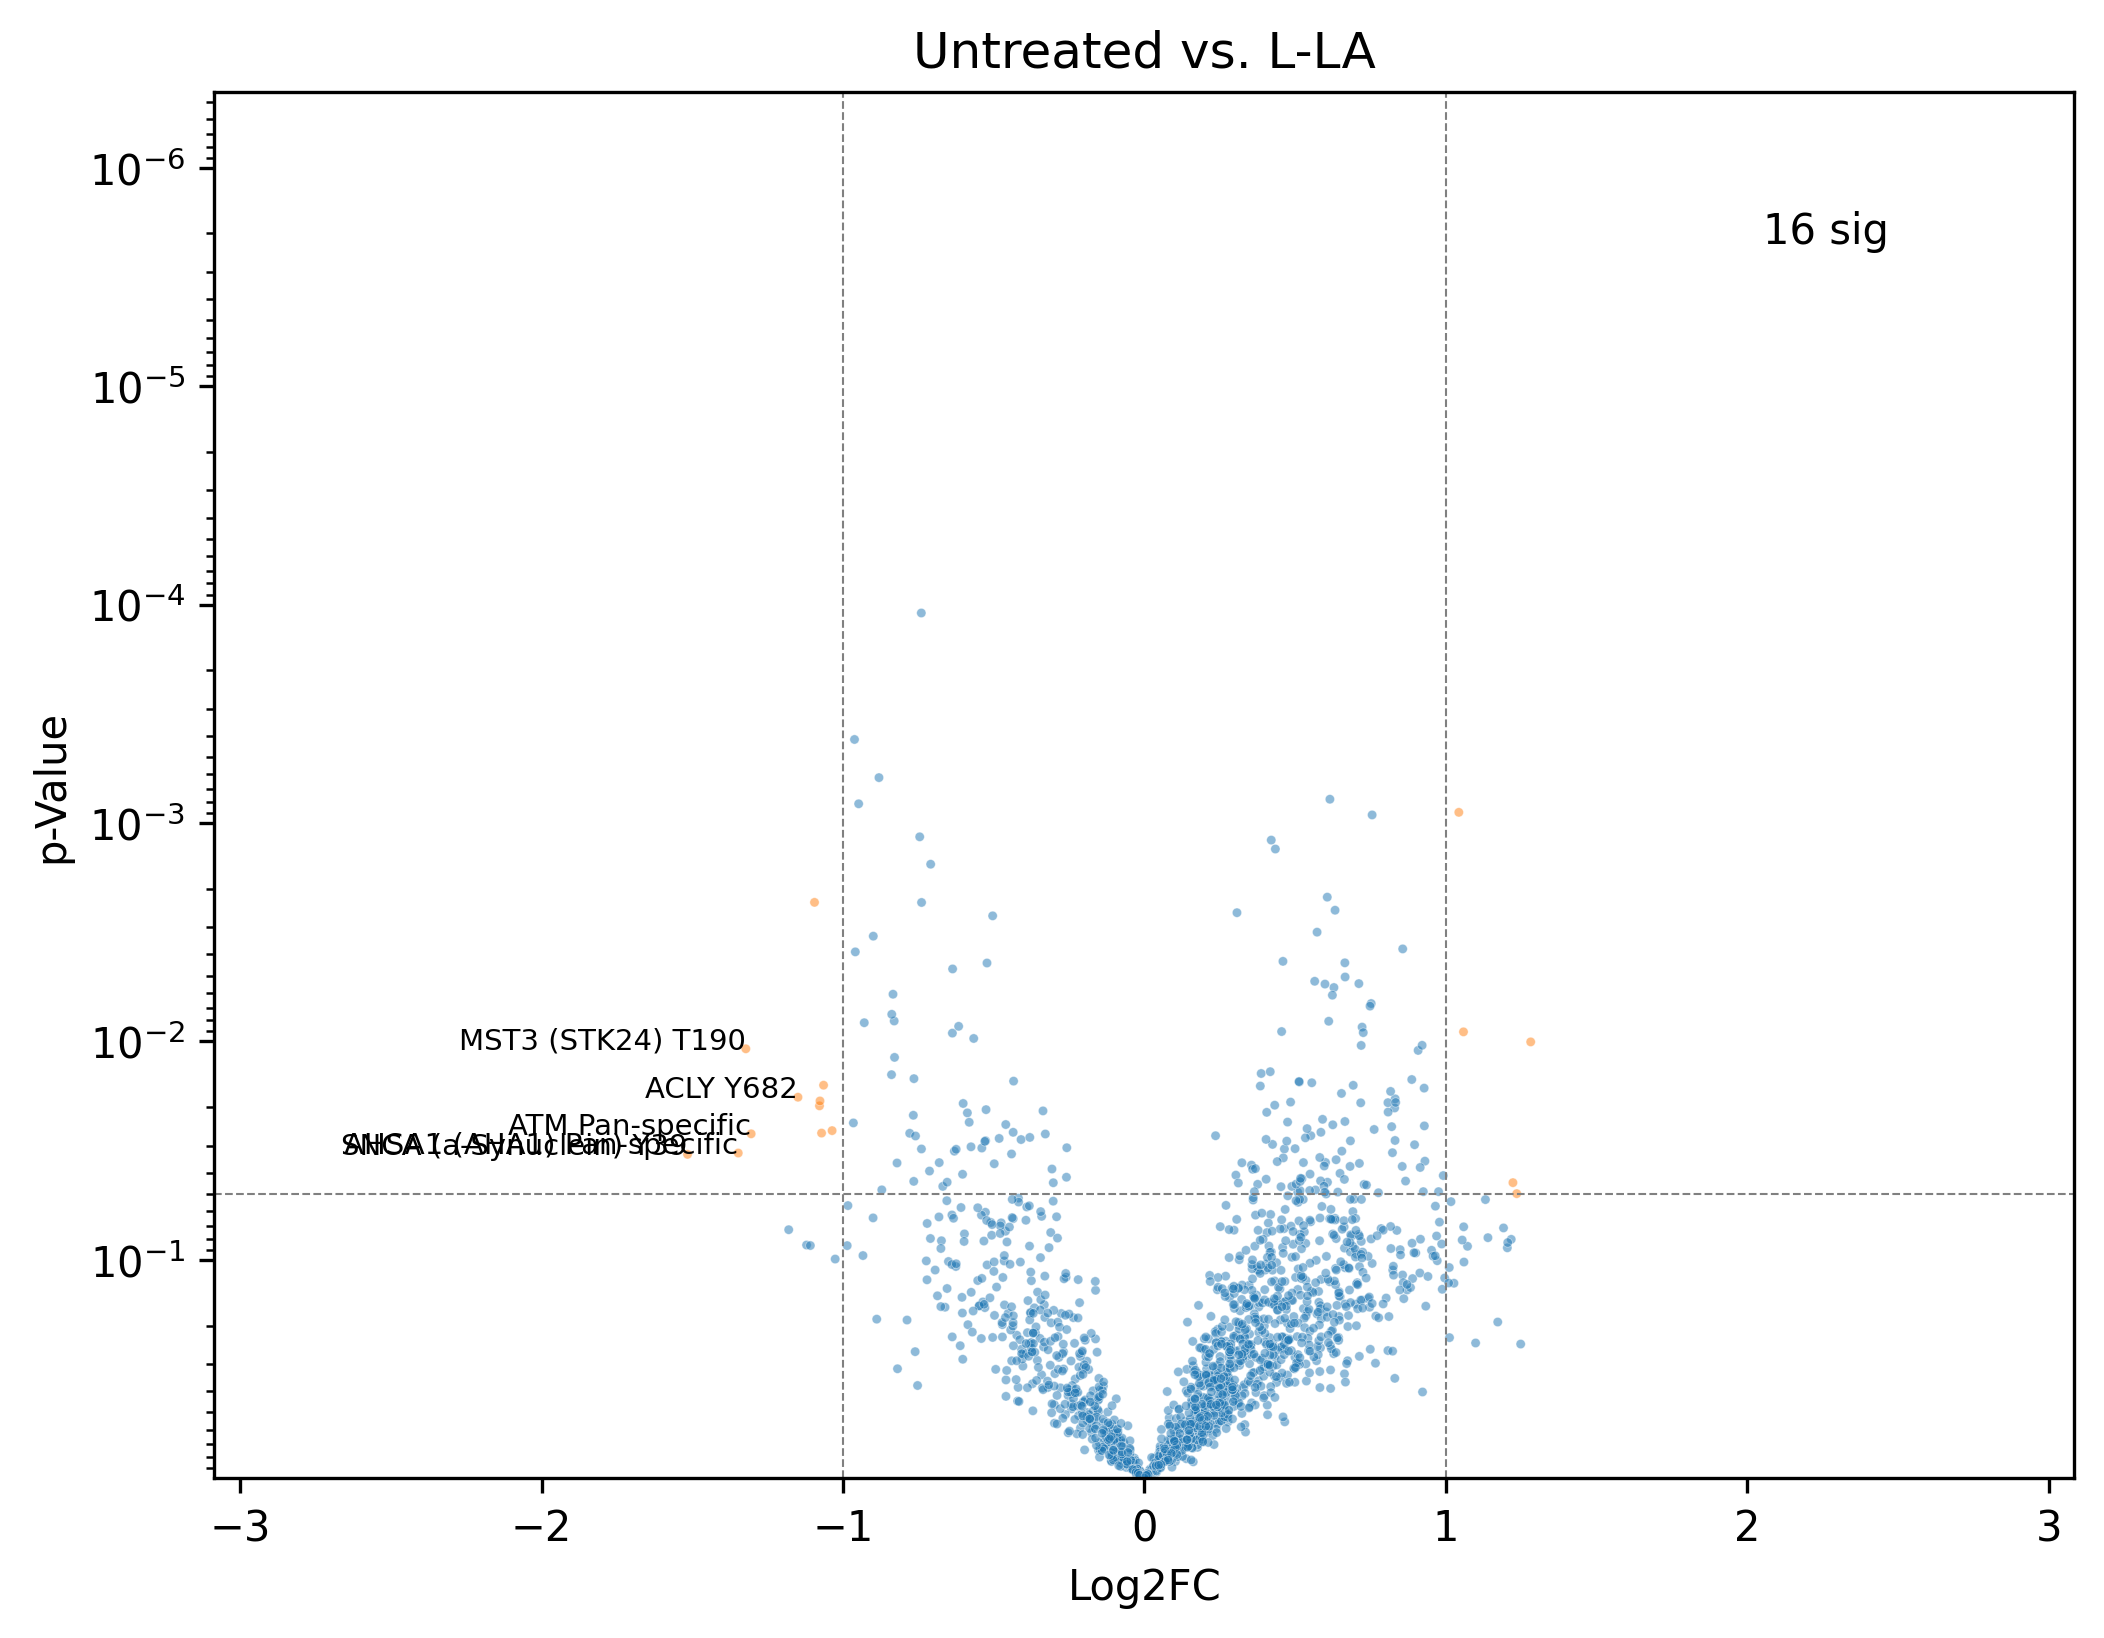

In [27]:
def sns_volc(base, exp, showPan=False):
  plt.figure(figsize=(8, 6), dpi=300)
  ax = plt.gca()
  title = f"{base} vs. {exp}"


  df = comparisons[(base, exp)]
  if not showPan:
    df = df[~df['isPan']]
  else:
    # title += " including Pan Specific Signals"
    pass

  plt.title(title)

  df['Title'] = df['Target Name'] + ' ' + df['Pan or P-Site']

  z_scores = stats.zscore(df[['log2fc', 'pval']])
  threshold = 3
  df['outlier'] = (df['pval'] < 0.05) & (z_scores['log2fc'] > threshold) | (z_scores['log2fc'] < -threshold) | (z_scores['pval'] > threshold) | (z_scores['pval'] < -threshold)

  fig = sns.scatterplot(data=df, x='log2fc', y='pval', ax=ax, hue='significant', legend=False, s=5, alpha=0.5)
  fig.text(0.9, 0.9, f"{df['significant'].sum()} sig", ha='right', va='center', transform=ax.transAxes, fontsize=10)

  display(df.iloc[:2])

  for i, row in df[df['outlier']].iterrows():
    if row['pval'] > 0.05:
      continue
    fig.text(row['log2fc'], row['pval'], row['Title'], fontsize=7, ha='right' if row['log2fc'] < 0 else 'left')

  ax.grid(False)
  ax.set_xlabel('Log2FC')
  ax.set_ylabel('p-Value')
  ax.set_xlim(min_fc, max_fc)
  ax.set_ylim(min_pval, max_pval)
  ax.set_yscale('log')
  ax.invert_yaxis()
  ax.axhline(y=0.05, color='gray', linestyle='--', linewidth=0.5)
  ax.axvline(x=1, color='gray', linestyle='--', linewidth=0.5)
  ax.axvline(x=-1, color='gray', linestyle='--', linewidth=0.5)

  plt.show()

sns_volc('Untreated', 'L-LA', showPan=True)


antibody  Target Name Target Uniprot ID Pan or P-Site    log2fc      pval  \
0   05-746   Histone H3            P84243            T3  0.006979  0.980142   
1  06-2020  Akt1 (PKBa)               NaN          Y474 -0.069587  0.820285   

   N_base  N_exp  significant             Title  outlier  
0       5      6        False     Histone H3 T3    False  
1       6      6        False  Akt1 (PKBa) Y474    False

antibody  Target Name Target Uniprot ID Pan or P-Site    log2fc      pval  \
0   05-746   Histone H3            P84243            T3 -0.415803  0.089823   
1  06-2020  Akt1 (PKBa)               NaN          Y474 -0.402250  0.077179   

   N_base  N_exp  significant             Title  outlier  
0       5      6        False     Histone H3 T3    False  
1       6      6        False  Akt1 (PKBa) Y474    False

antibody  Target Name Target Uniprot ID Pan or P-Site    log2fc      pval  \
0   05-746   Histone H3            P84243            T3 -0.197117  0.461258   
1  06-2020  Akt1 (PKBa)               NaN          Y474 -0.336611  0.145843   

   N_base  N_exp  significant             Title  outlier  
0       6      5        False     Histone H3 T3    False  
1       6      6        False  Akt1 (PKBa) Y474    False

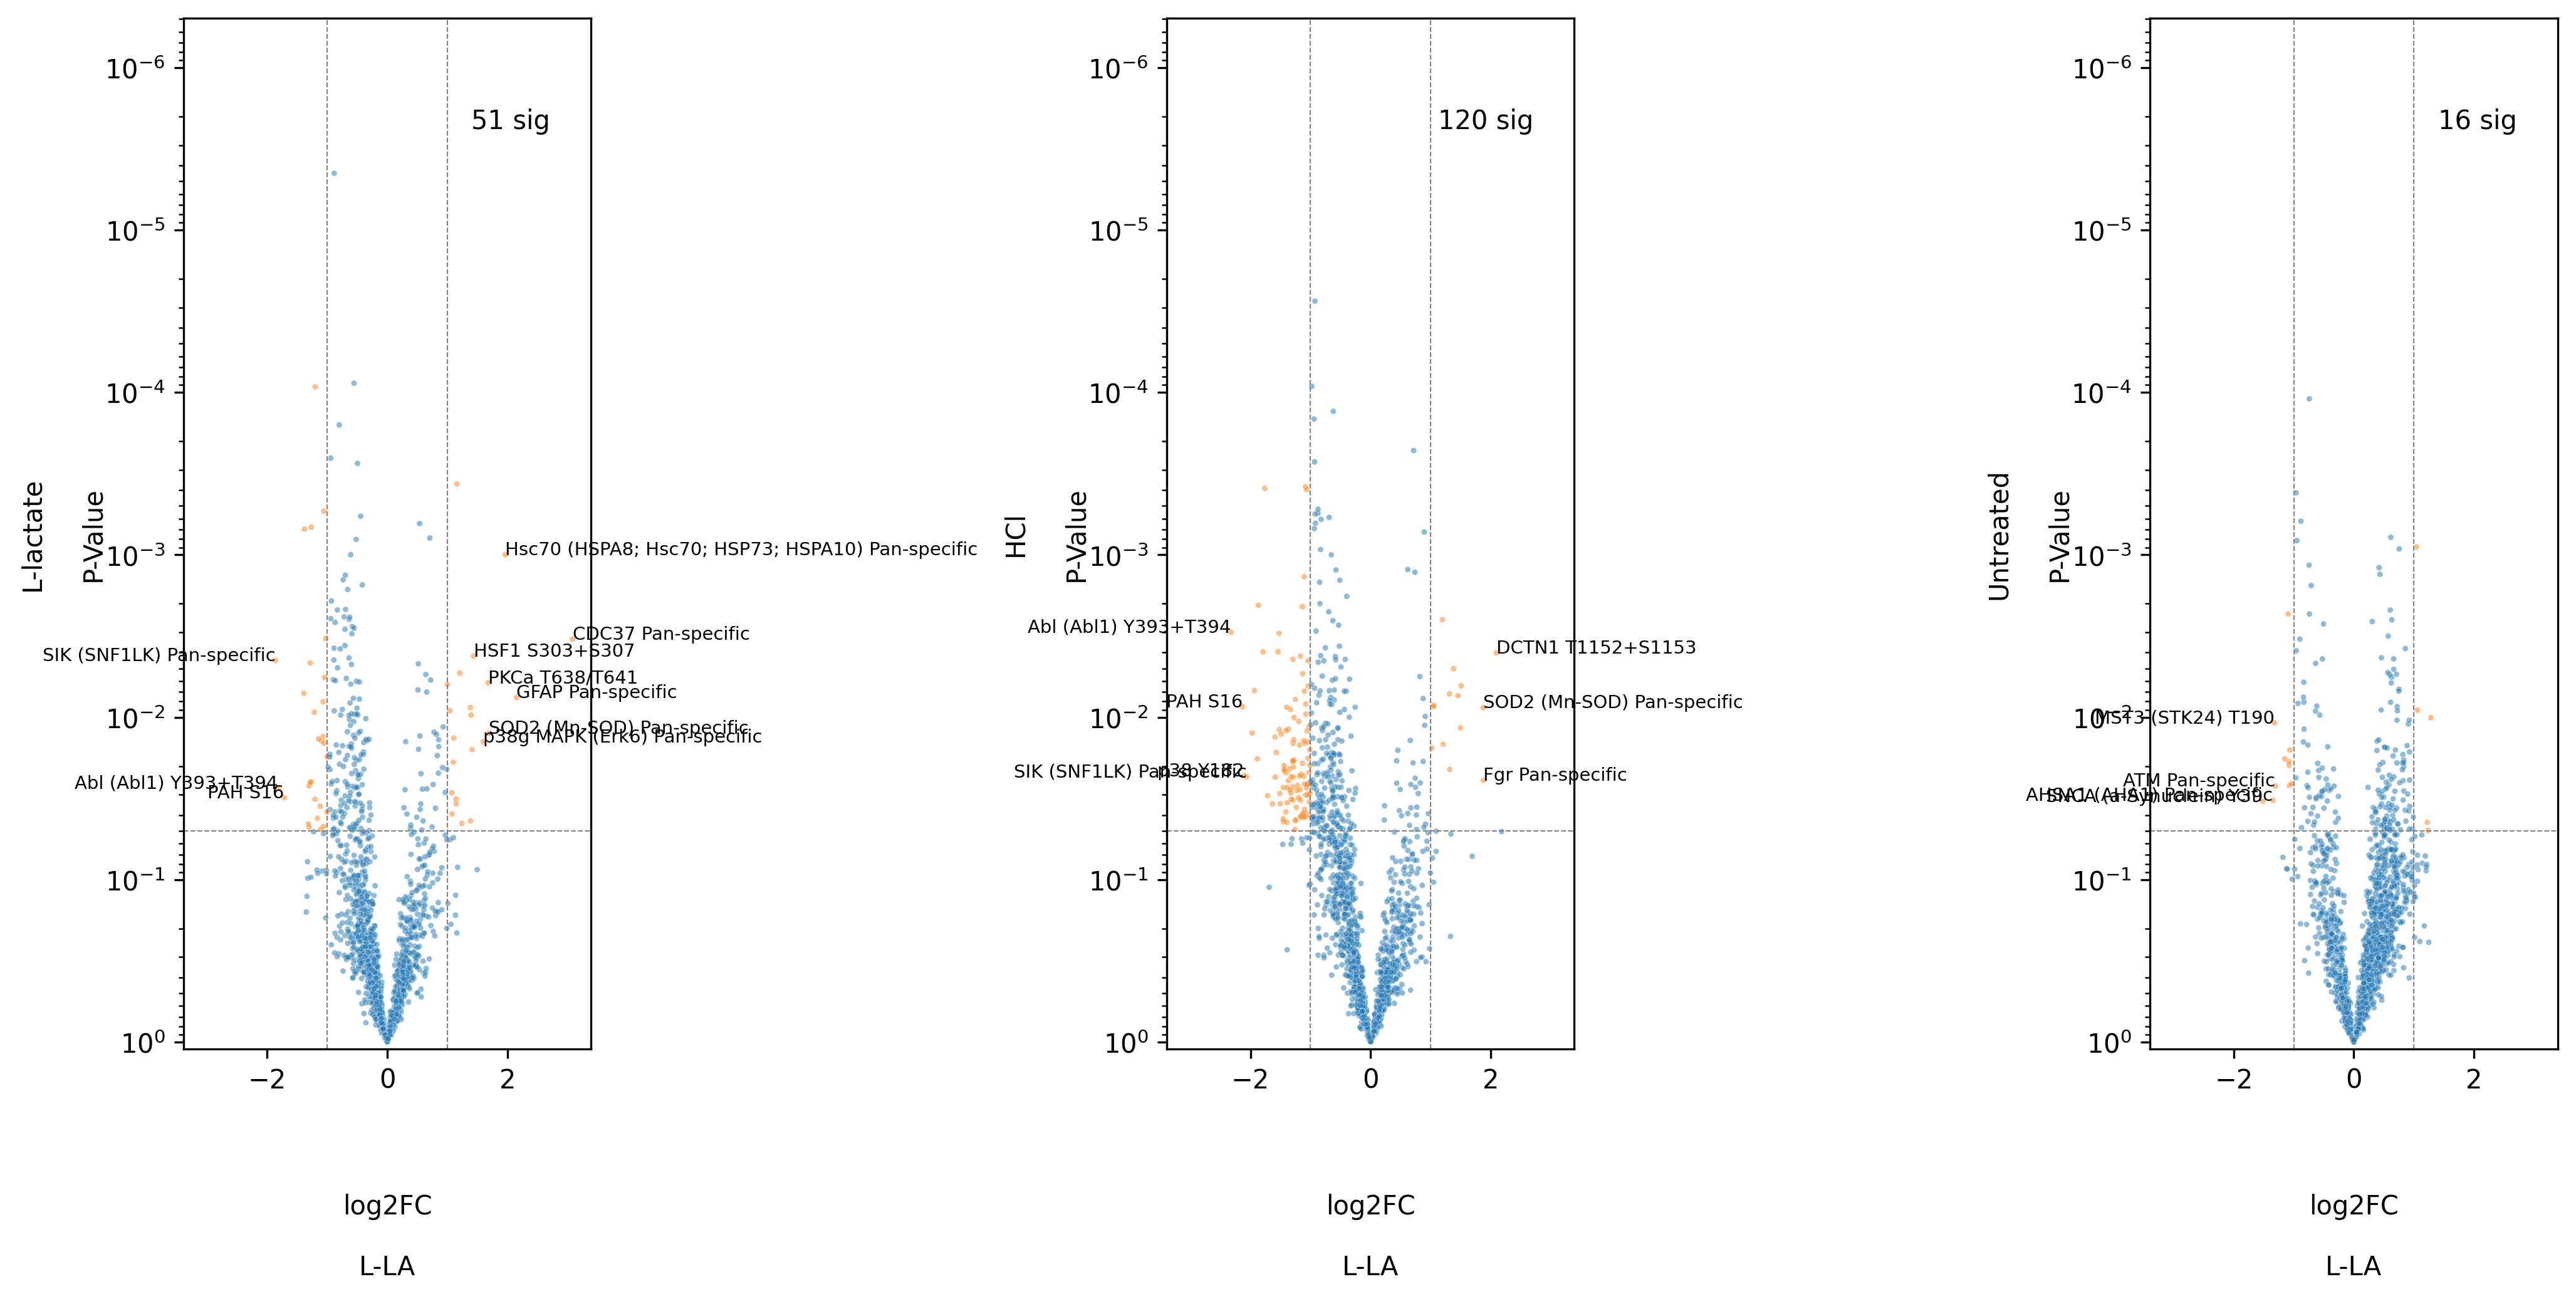

In [28]:
max_fc = 1.1*max(df['log2fc'].max() for df in comparisons.values())
min_fc = 1.1*min(df['log2fc'].min() for df in comparisons.values())
max_pval = 1.1*max(df['pval'].max() for df in comparisons.values())
min_pval = 1.1*min(df['pval'].min() for df in comparisons.values())

# Create a subplot grid
n = len(groups)
fig, axes = plt.subplots(1, 3, figsize=(14, 7), dpi=300)

axes = axes.flatten()

# Iterate through the dictionary and plot the data
key_b = 'L-LA'
for col, key_a in enumerate(['Untreated', 'L-lactate', 'HCl']):
    name_a = key_a
    name_b = key_b
    ax = axes[col-1]

    # JACK skip diagonal
    if key_a == key_b:
      pass
      # df = groups[key_a]
      # sns.histplot(df['Normalized'], ax=ax)
    else:
      df = comparisons[(key_a, key_b)]
      # df = df[~df['isPan']]
      df['Title'] = df['Target Name'] + ' ' + df['Pan or P-Site']

      z_scores = stats.zscore(df[['log2fc', 'pval']])
      threshold = 3.3
      df['outlier'] = (df['pval'] < 0.05) & (z_scores['log2fc'] > threshold) | (z_scores['log2fc'] < -threshold) | (z_scores['pval'] > threshold) | (z_scores['pval'] < -threshold)

      fig = sns.scatterplot(data=df, x='log2fc', y='pval', ax=ax, hue='significant', legend=False, s=5, alpha=0.5)
      fig.text(0.9, 0.9, f"{df['significant'].sum()} sig", ha='right', va='center', transform=ax.transAxes, fontsize=10)

      display(df.iloc[:2])

      for i, row in df[df['outlier']].iterrows():
        if row['pval'] > 0.05:
          continue
        fig.text(row['log2fc'], row['pval'], row['Title'], fontsize=7, ha='right' if row['log2fc'] < 0 else 'left')

      ax.grid(False)
      ax.set_xlim(min_fc, max_fc)
      ax.set_ylim(min_pval, max_pval)
      ax.set_yscale('log')
      ax.invert_yaxis()
      ax.axhline(y=0.05, color='gray', linestyle='--', linewidth=0.5)
      ax.axvline(x=1, color='gray', linestyle='--', linewidth=0.5)
      ax.axvline(x=-1, color='gray', linestyle='--', linewidth=0.5)

    ax.set_xlabel(None)
    ax.set_ylabel(None)

    # if col == 1:
    ax.set_ylabel(name_a+'\n\nP-Value')
    ax.yaxis.set_label_coords(-0.19, 0.5)  # Adjust the label position
    # else:
      # ax.set_yticklabels([])

    # ax.set_yticklabels([])
    ax.set_xlabel('log2FC\n\n'+name_b)
    ax.xaxis.set_label_coords(0.5, -0.14)

# Adjust subplot spacing
plt.tight_layout()

# Show the plot
plt.show()

In [30]:
def get_significant(key_a, key_b):

  out_df = comparisons[(key_a, key_b)]
  out_df = out_df[out_df['significant']]
  out_df['Title'] = out_df['Target Name'] + ' ' + out_df['Pan or P-Site']
  out_df = out_df[['Title', 'log2fc', 'pval']]
  out_df = out_df.set_index('Title')
  out_df = out_df.sort_values('log2fc')

  out_df.index.name = 'Significant signals: ' + key_a + ' vs. ' + key_b

  def make_pretty(styler):
    # styler.set_caption(title)
    styler = styler.format(precision=2)
    styler.background_gradient(axis=None, vmin=-2, vmax=2, cmap="coolwarm")
    styler.set_table_attributes("style='display:inline'")

    styler = styler.format(subset=['pval'], formatter="{:.1e}".format)
    return styler

  out_df = out_df[~out_df.index.duplicated(keep='last')]
  return out_df.style.pipe(make_pretty)


df = get_significant('Untreated', 'L-LA')
df

In [32]:
comps = []
for key, df in comparisons.items():
  df['base'] = key[0]
  df['exp'] = key[1]
  df['Title'] = df['Target Name'] + ' ' + df['Pan or P-Site']
  df['Comparison'] = " vs. ".join(key)
  comps.append(df)

comparisons_df = pd.concat(comps)

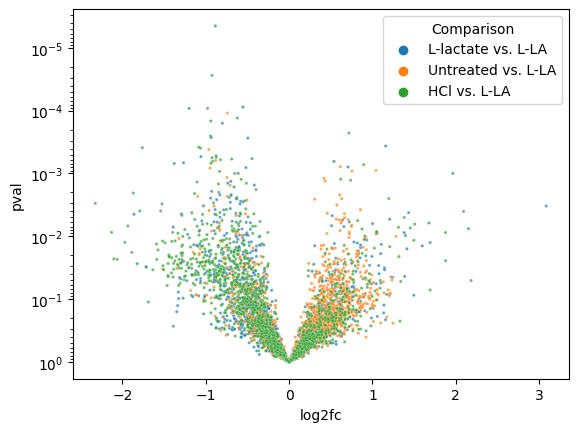

In [33]:
exp_df = comparisons_df[comparisons_df['exp'] == 'L-LA']

ax = plt.gca()
sns.scatterplot(data=exp_df, x='log2fc', y='pval', ax=ax, hue='Comparison', legend=True, s=5, alpha=0.7)
ax.set_yscale('log')
ax.invert_yaxis()

# Venn Diagrams

In [34]:
n = len(groups)
square = np.zeros((n,n))

for i, key_a in enumerate(groups.keys()):
  for j, key_b in enumerate(groups.keys()):
    if i == j:
      continue

    df = comparisons[(key_a, key_b)]
    # df = df[~df['isPan']]
    square[i][j] = df['significant'].sum()

names = groups.keys()
square_df = pd.DataFrame(square, index=names, columns=names)
px.imshow(square_df, text_auto=True, title='Total significant signals per Comparison<br>(indicates general activity?)')

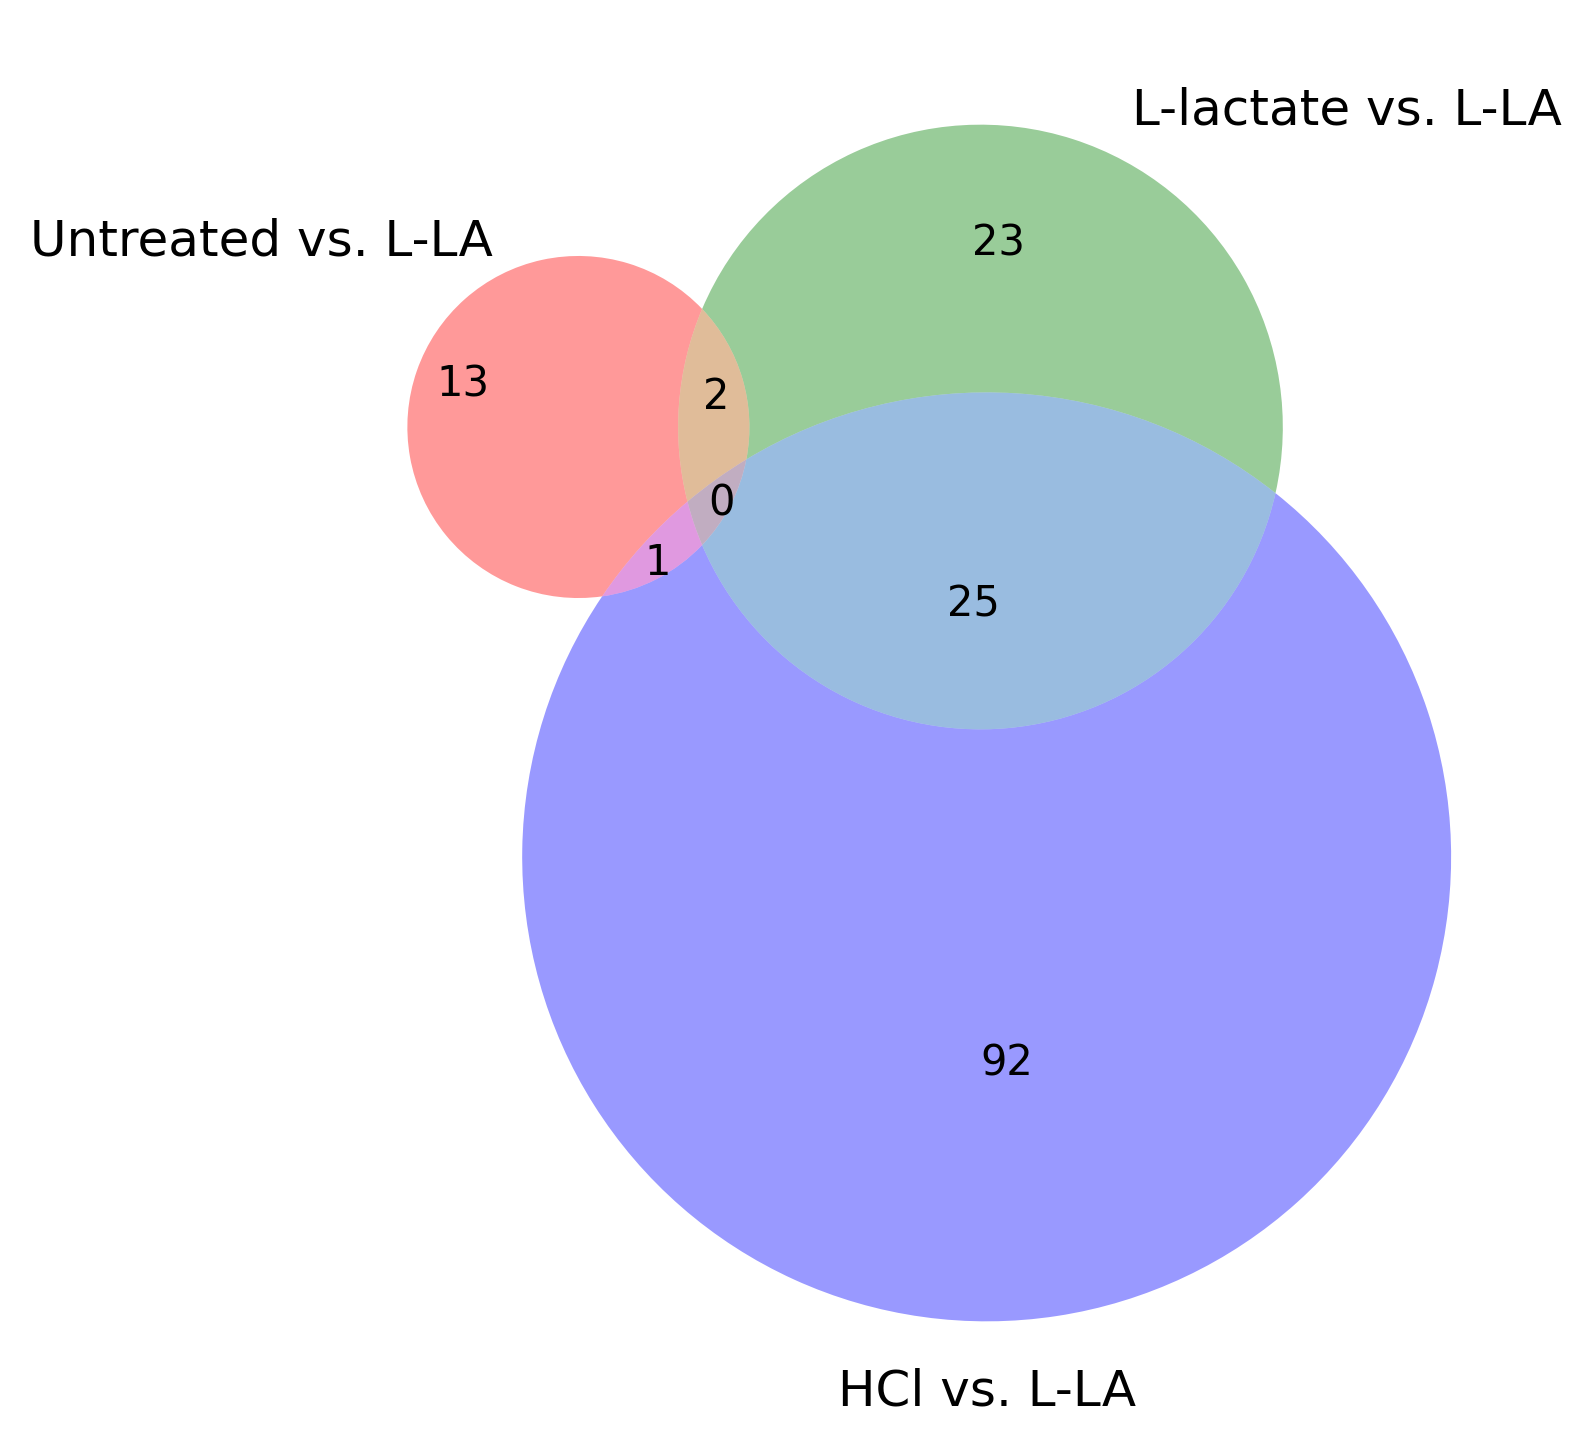

In [35]:
fc_abs_cutoff = 1
pval_cutoff = 0.05

def significance_filter_df(df):
  # df = df[~df['isPan']]
  df.loc[:, 'Title'] = df['Target Name'] + ' ' + df['Pan or P-Site']
  return df[(df['pval'] < pval_cutoff) & (df['log2fc'].abs() >= abs(fc_abs_cutoff))]

keys = [('Untreated', 'L-LA'), ('L-lactate', 'L-LA'), ('HCl', 'L-LA')]
dfs = {key:significance_filter_df(comparisons[key]) for key in keys}
names_sets = {key:set(df['Title']) for key, df in dfs.items()}

plt.figure(figsize=(8, 6), dpi=300)
venn3(names_sets.values(), [x[0]+' vs. '+x[1] for x in names_sets.keys()])

In [56]:
import functools

def get_overlap(include=[set()], exclude=[set()]):

  out_set = set.union(*[names_sets[i] for i in exclude], set())
  in_set = set.intersection(*[names_sets[i] for i in include])
  difference = in_set.difference(out_set)

  all_keys = include+exclude
  dfs = {key:significance_filter_df(comparisons[key]).set_index('Title') for key in all_keys}
  df_filters = {" vs. ".join(key):df[df.index.isin(difference)]['pval'] for key, df in dfs.items()}
  df_filters = {key:df[~df.index.duplicated()] for key, df in df_filters.items()}
  out_df = pd.DataFrame(df_filters)
  out_df = out_df.sort_values(out_df.columns[0])

  def make_pretty(styler):
    # styler.set_caption(title)
    styler = styler.set_precision(2)
    styler.background_gradient(axis=None, vmin=-2, vmax=2, cmap="coolwarm")
    styler.set_table_attributes("style='display:inline'")
    return styler

  return out_df#.style.pipe(make_pretty)

get_overlap(include=[  ('L-lactate', 'L-LA'), ('HCl', 'L-LA'),   ], exclude=[    ('Untreated', 'L-LA'),])

L-lactate vs. L-LA  HCl vs. L-LA  \
Title                                                                    
CDC7 T376                                       0.000693      0.002046   
CDC37 Pan-specific                              0.003298      0.011623   
HSF1 S303+S307                                  0.004197      0.005007   
SIK (SNF1LK) Pan-specific                       0.004466      0.023315   
PINK1 T257                                      0.005682      0.024552   
Fyn Y420                                        0.009117      0.008567   
SOD2 (Mn-SOD) Pan-specific                      0.012569      0.008719   
PKR1 (PRKR; EIF2AK2) Pan-specific               0.013148      0.018528   
p38g MAPK (Erk6) Pan-specific                   0.014188      0.021010   
SNCA (a-Synuclein) Pan-specific                 0.014459      0.019217   
ERK2 (MAPK1; ERT1) Pan-specific                 0.015832      0.008426   
MELK Pan-specific                               0.017506      0.049139   
FAK (PTK2) Y576+Y577                            0.024967      0.007773   
VHL S111                                        0.025214      0.032406   
ICK Pan-specific                                0.026475      0.018045   
Abl (Abl1) Y393+T394                            0.027287      0.002992   
PAH S16                                         0.031240      0.008653   
CREB1 S133                                      0.031954      0.043336   
CDKN2A (p16; p16-INK4a) Pan-specific            0.038235      0.000380   
PKCz (PRKCZ) S262+Y263                          0.041886      0.023365   
Fgr Pan-specific                                0.043529      0.024464   
ACLY S455                                       0.045302      0.012075   
MKK3 (MAP2K3, MEK3) Pan-specific                0.047074      0.026331   
FAK (PTK2) Y577                                 0.047747      0.027063   
JNK1 (MAPK8; SAPK1) Y185                        0.048962      0.003941   

                                      Untreated vs. L-LA  
Title                                                     
CDC7 T376                                            NaN  
CDC37 Pan-specific                                   NaN  
HSF1 S303+S307                                       NaN  
SIK (SNF1LK) Pan-specific                            NaN  
PINK1 T257                                           NaN  
Fyn Y420                                             NaN  
SOD2 (Mn-SOD) Pan-specific                           NaN  
PKR1 (PRKR; EIF2AK2) Pan-specific                    NaN  
p38g MAPK (Erk6) Pan-specific                        NaN  
SNCA (a-Synuclein) Pan-specific                      NaN  
ERK2 (MAPK1; ERT1) Pan-specific                      NaN  
MELK Pan-specific                                    NaN  
FAK (PTK2) Y576+Y577                                 NaN  
VHL S111                                             NaN  
ICK Pan-specific                                     NaN  
Abl (Abl1) Y393+T394                                 NaN  
PAH S16                                              NaN  
CREB1 S133                                           NaN  
CDKN2A (p16; p16-INK4a) Pan-specific                 NaN  
PKCz (PRKCZ) S262+Y263                               NaN  
Fgr Pan-specific                                     NaN  
ACLY S455                                            NaN  
MKK3 (MAP2K3, MEK3) Pan-specific                     NaN  
FAK (PTK2) Y577                                      NaN  
JNK1 (MAPK8; SAPK1) Y185                             NaN

In [1]:
from IPython.display import display_html


def makeVenn(key_a, key_b, pval_cutoff=0.05, fc_abs_cutoff=1):
  fc1 = comparisons[key_a]
  fc2 = comparisons[key_b]

  # fc1 = fc1[~fc1['isPan']]
  # fc2 = fc2[~fc2['isPan']]

  fc1_sel = fc1[(fc1['pval'] <= pval_cutoff) & (fc1['log2fc'].abs() >= abs(fc_abs_cutoff))].reset_index(drop=True)
  fc2_sel = fc2[(fc2['pval'] <= pval_cutoff) & (fc2['log2fc'].abs() >= abs(fc_abs_cutoff))].reset_index(drop=True)

  fc1_sel.loc[:, 'Title'] = fc1_sel['Target Name'] + ' ' + fc1_sel['Pan or P-Site']
  fc2_sel.loc[:, 'Title'] = fc2_sel['Target Name'] + ' ' + fc2_sel['Pan or P-Site']

  A_names = set(fc1_sel['Title']).difference(set(fc2_sel['Title']))
  both_names = set(fc1_sel['Title']).intersection(set(fc2_sel['Title']))
  B_names = set(fc2_sel['Title']).difference(set(fc1_sel['Title']))

  A = fc1_sel[fc1_sel['Title'].isin(A_names)]
  B = fc2_sel[fc2_sel['Title'].isin(B_names)]

  both = fc1_sel.merge(fc2_sel, left_on='Title', right_on='Title')
  both = both[['Title', 'log2fc_x', 'log2fc_y']].rename(columns={'log2fc_x': 'log2fc_A', 'log2fc_y': 'log2fc_B'})

  ## DUPLICATE ANTIBODIES GET MEAN'D
  A = A[['Title', 'log2fc']].groupby('Title').mean().sort_values('log2fc')
  B = B[['Title', 'log2fc']].groupby('Title').mean().sort_values('log2fc')
  both = both.groupby('Title').mean().sort_values(['log2fc_A', 'log2fc_B'])

  def make_pretty(styler, title):
    styler.set_caption(title)
    styler = styler.set_precision(2)
    styler.background_gradient(axis=None, vmin=-2, vmax=2, cmap="coolwarm")
    styler.set_table_attributes("style='display:inline'")
    return styler

  fc1
  # drop to 2

#   return display_html(
#        A.style.pipe(make_pretty, f'{key_a[0]} vs. {key_a[1]}<br>N={len(A)}')._repr_html_()
#       +both.style.pipe(make_pretty, f"Overlap <br>N={len(both)}")._repr_html_()
#       +B.style.pipe(make_pretty, f'{key_b[0]} vs. {key_b[1]}<br>N={len(B)}')._repr_html_(),
#        raw=True)

x = makeVenn(('Untreated', 'L-LA'), ('Untreated', 'L-lactate'), pval_cutoff=0.05, fc_abs_cutoff=1.0)

NameError: ignored

# Fold Change Plots

<Axes: title={'center': 'Pan Signals Excluded'}, xlabel='Comparison', ylabel='log2fc'>

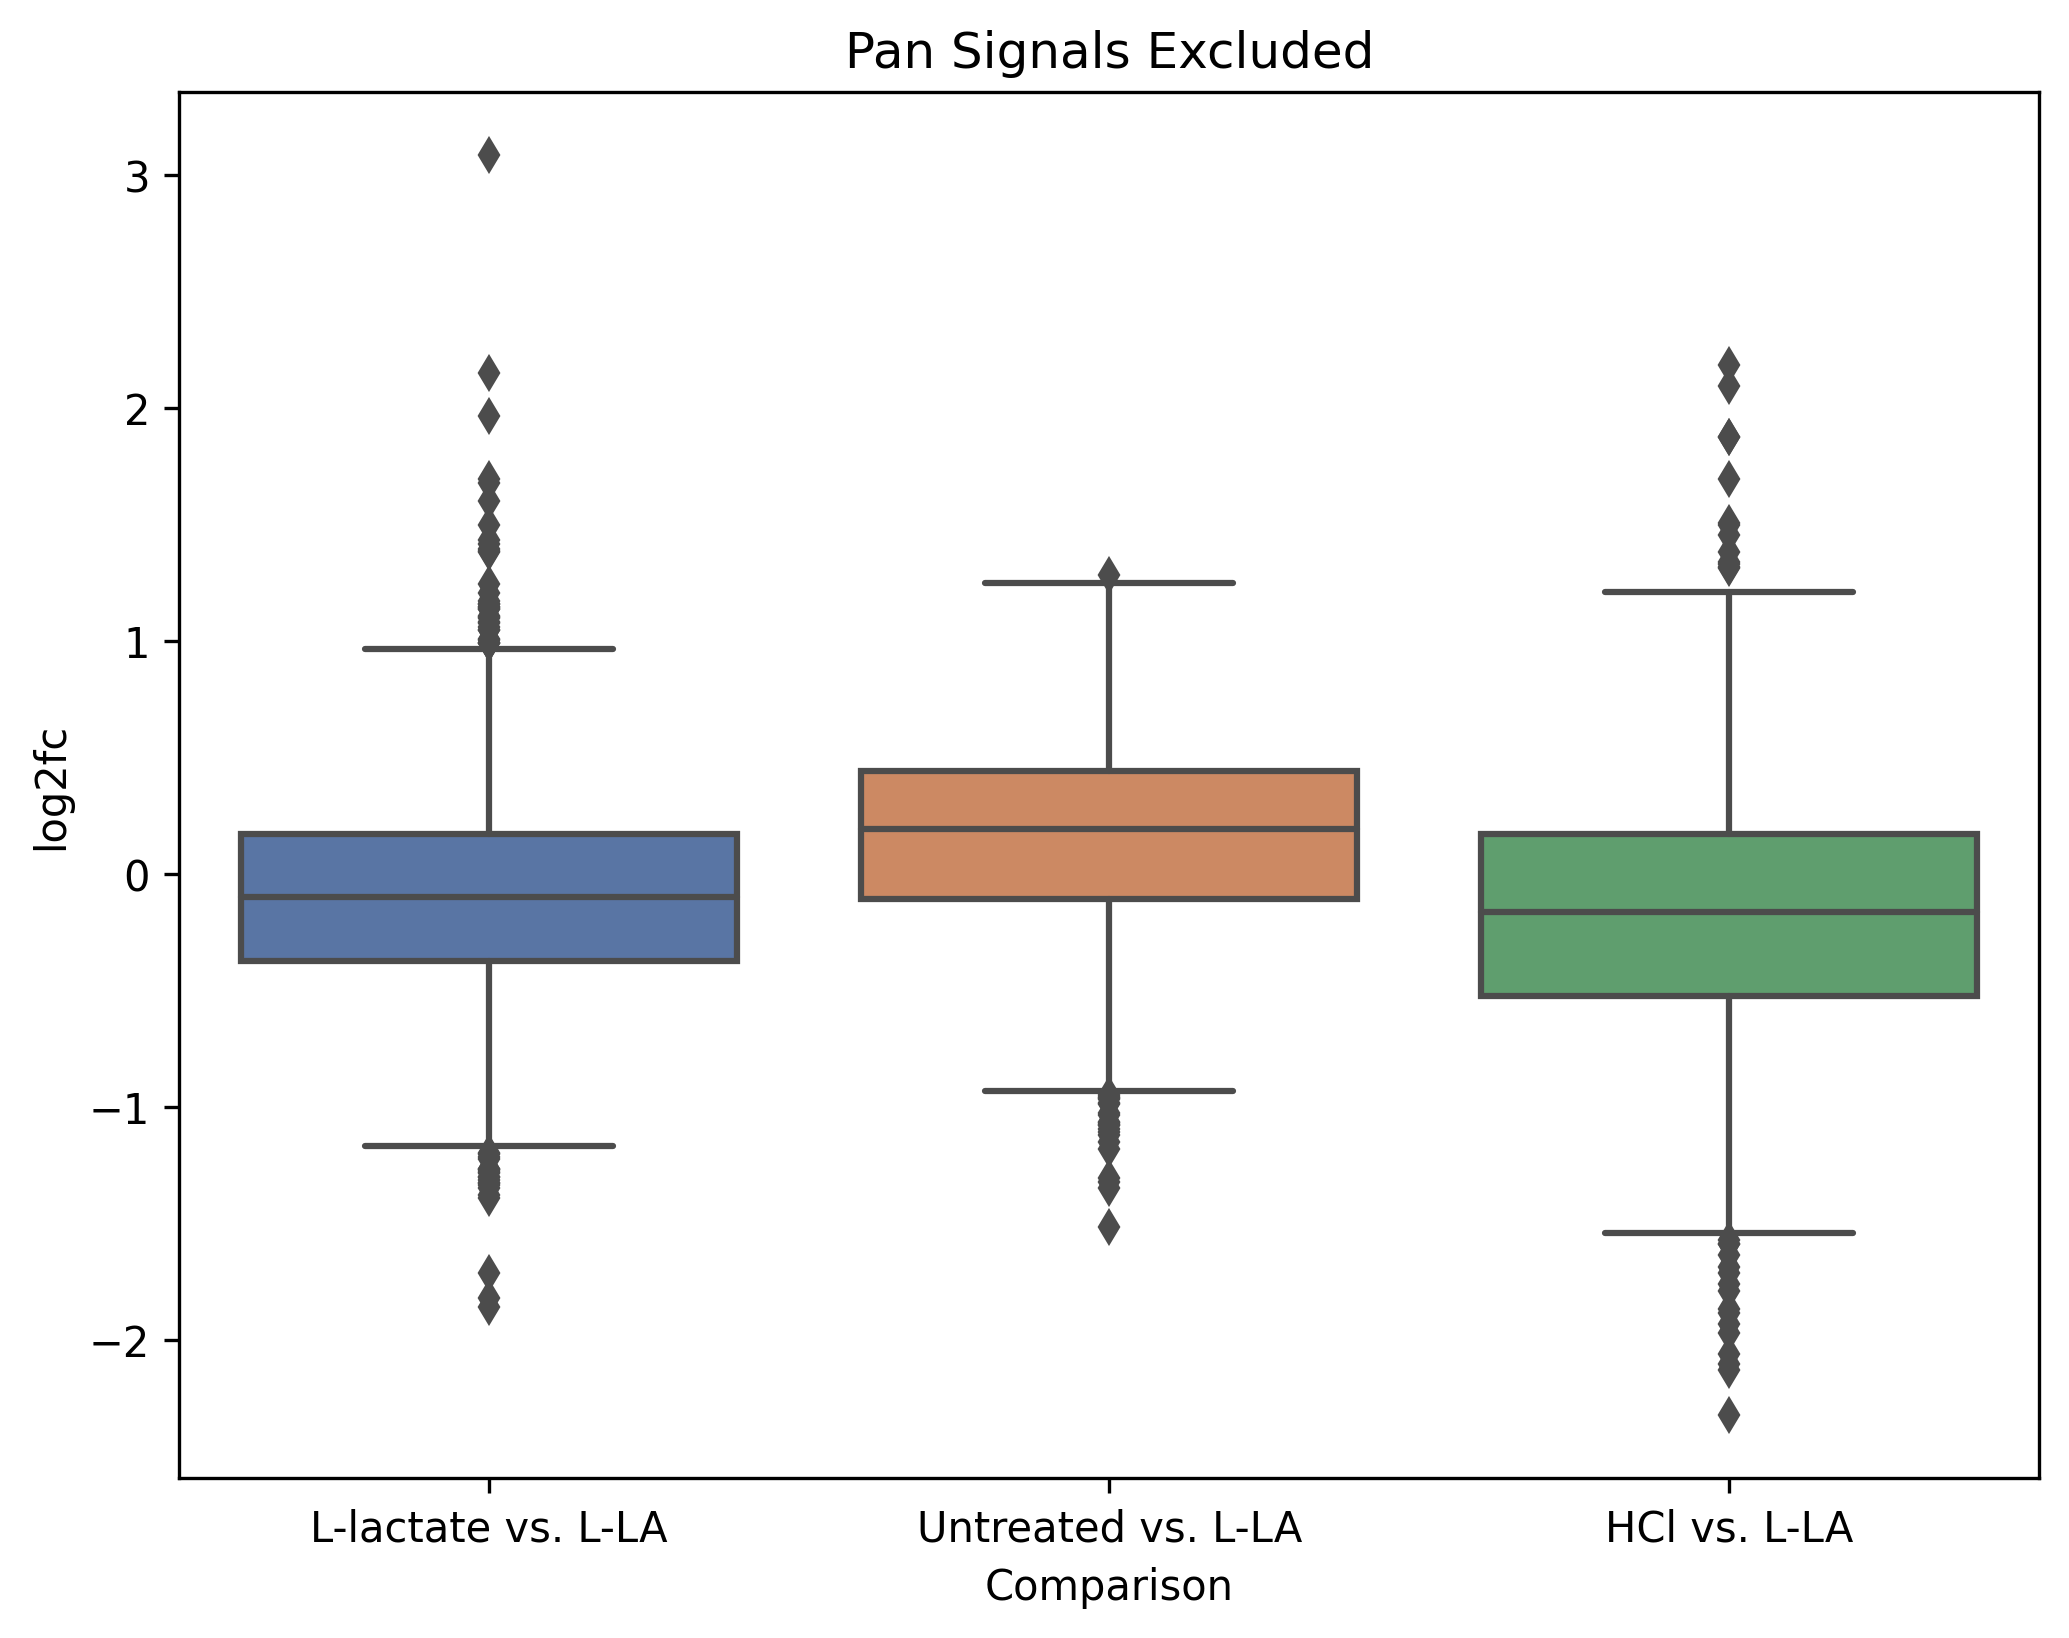

In [34]:
plt.figure(figsize=(8, 6), dpi=300)
plt.title('Pan Signals Excluded')
pal = sns.color_palette()[0:]
sns.set_palette(pal)
sns.set(style="whitegrid")
sns.boxplot(data=exp_df, x="Comparison", y="log2fc")

# [~exp_df['Title'].str.lower().str.contains('pan')]
# labels = ['Sham vs. Sham Apo', 'Sham vs. Smoke Treated', 'Smoke Treated vs.\nSmoke Treated Apocynin']
# plt.xticks(range(len(labels)), labels, ha="center")

<Axes: title={'center': 'Distribtuion of Fold Changes, Pan Highlighted in Red'}, xlabel='Comparison', ylabel='log2fc'>

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning:

7.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning:

6.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.



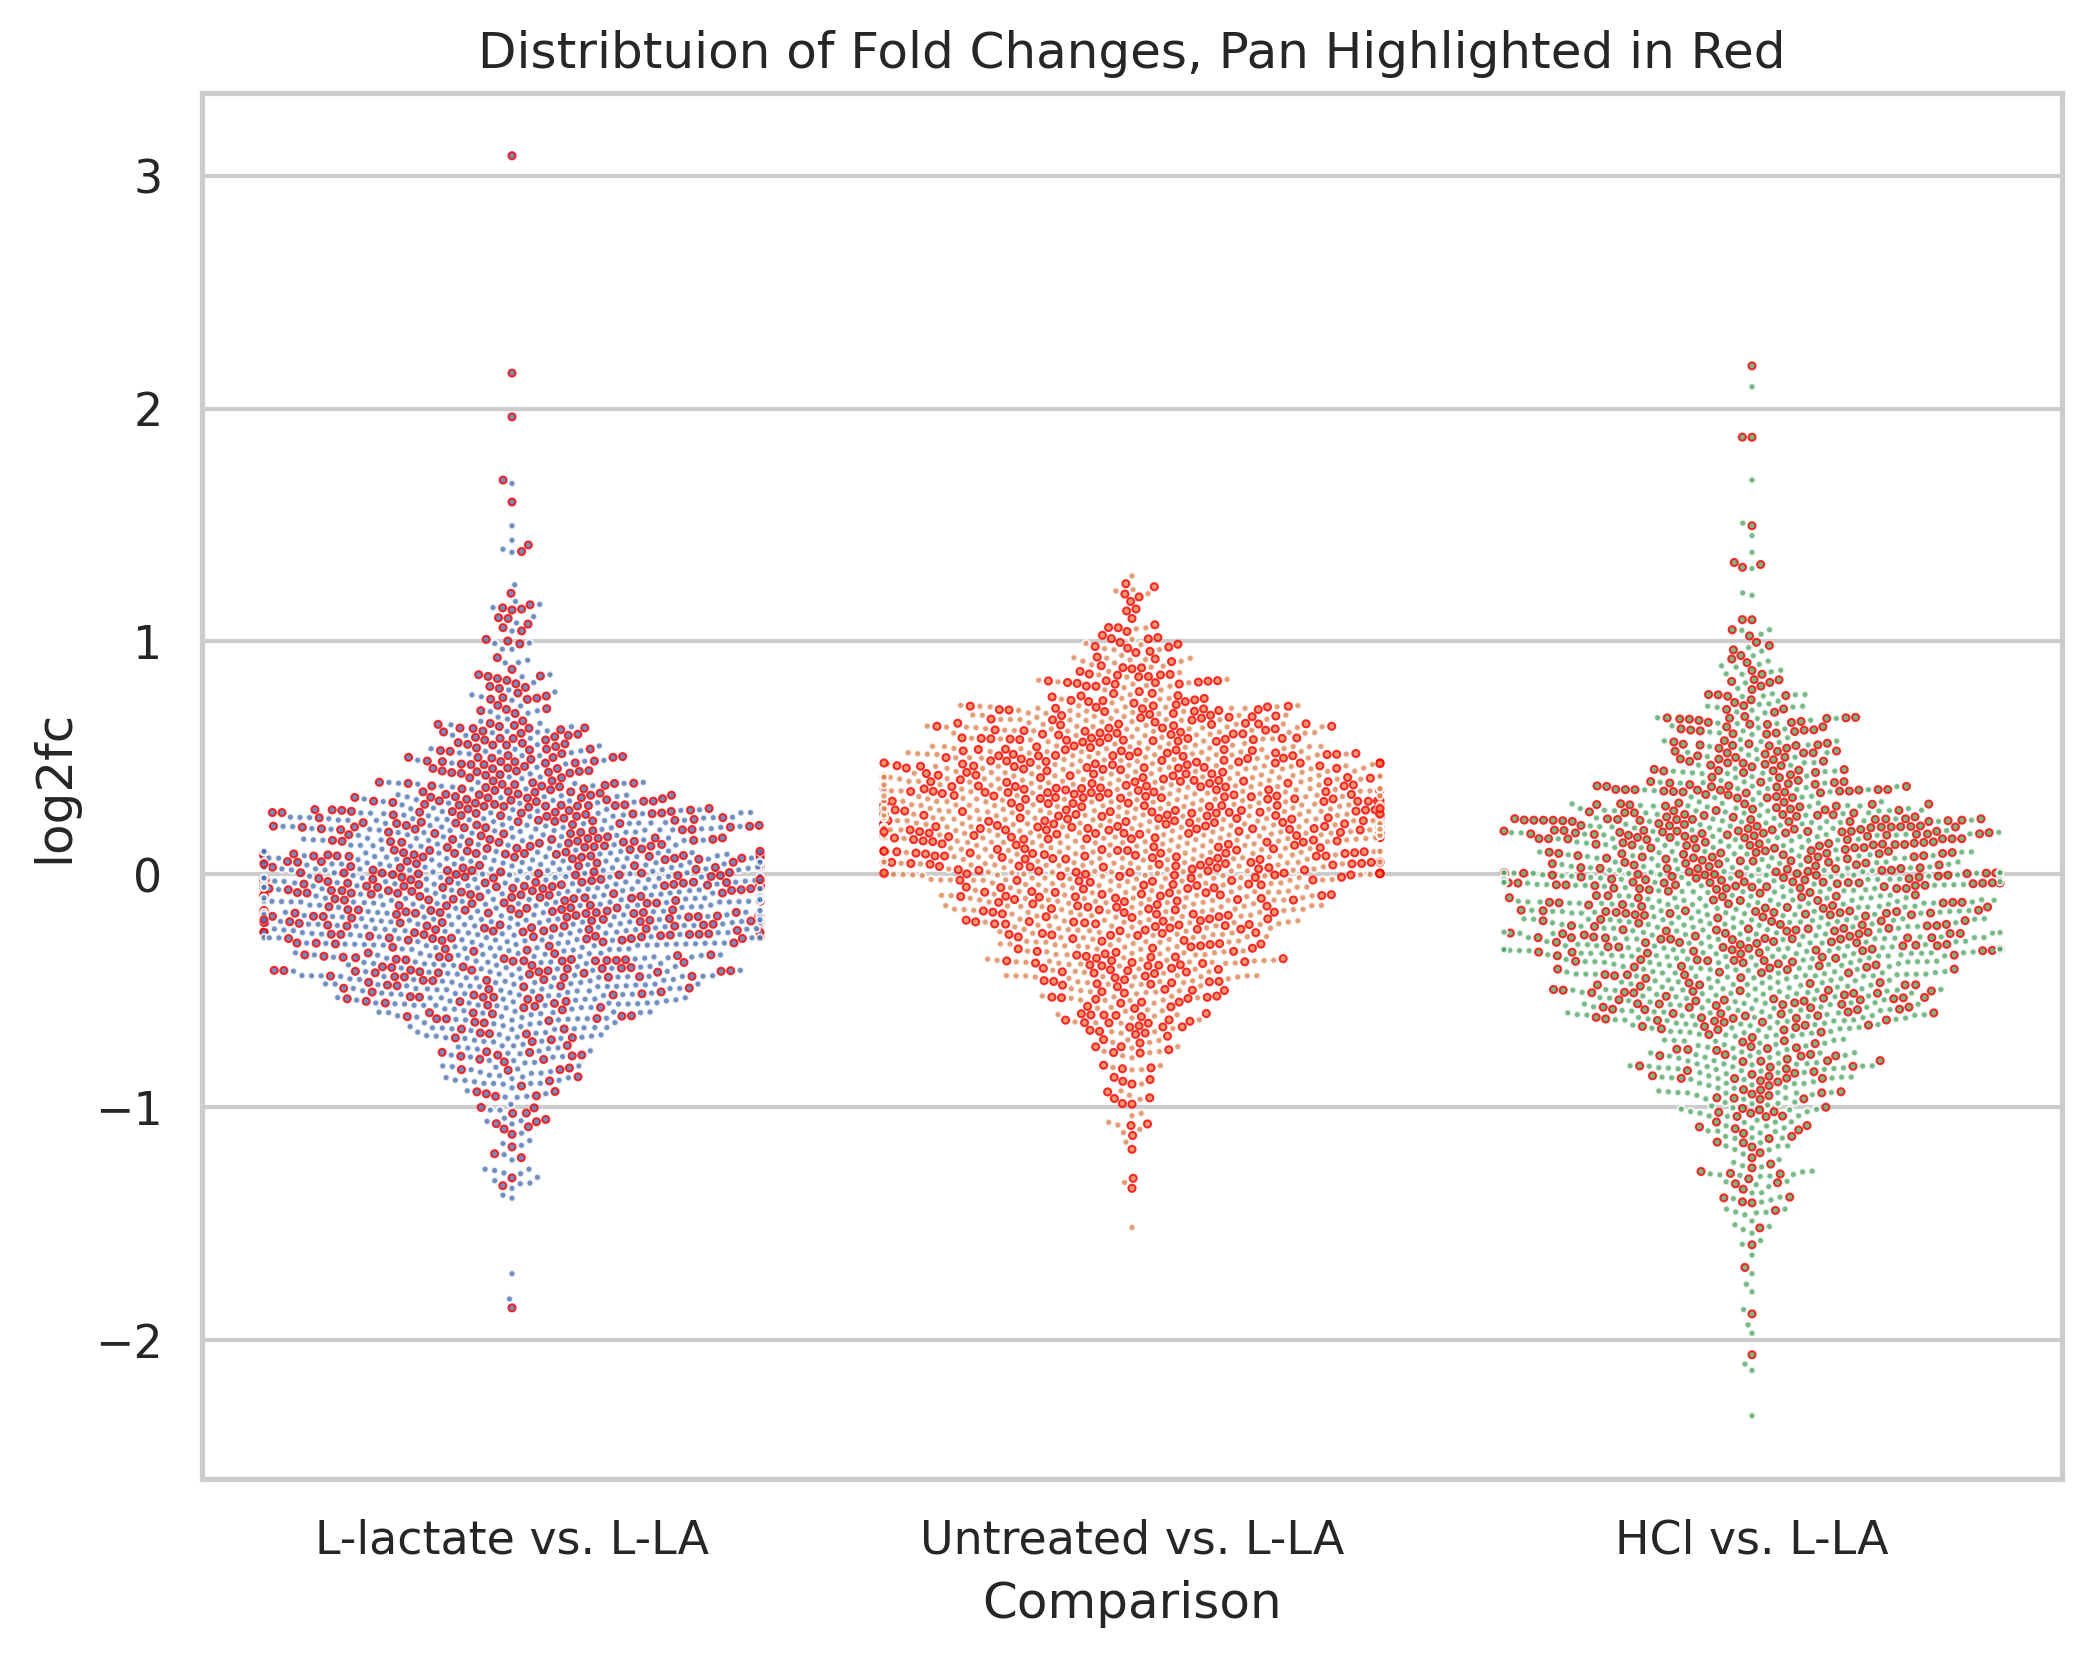

In [35]:
plt.figure(figsize=(8, 6), dpi=300)
pal = sns.color_palette()[0:]
sns.set_palette(pal)
sns.set(style="whitegrid")
plt.title("Distribtuion of Fold Changes, Pan Highlighted in Red")

X = exp_df#.iloc[:10]
X['isPan'] = X['Title'].str.lower().str.contains('pan')

def bbb(row):
  if row['isPan']:
    return "red"
  return "white"

X['col'] = X.apply(bbb, axis=1)

# edge_colors = sns.color_palette("viridis", as_cmap=True)(X["isPan"])
# edge_colors
sns.swarmplot(data=X, x='Comparison', hue="base", y="log2fc", alpha=0.80, s=1.7, legend=False, edgecolor=list(X['col']), linewidth=0.5)

# # Add labels and a title
# plt.ylabel("Log2 Fold Change")
# plt.show()

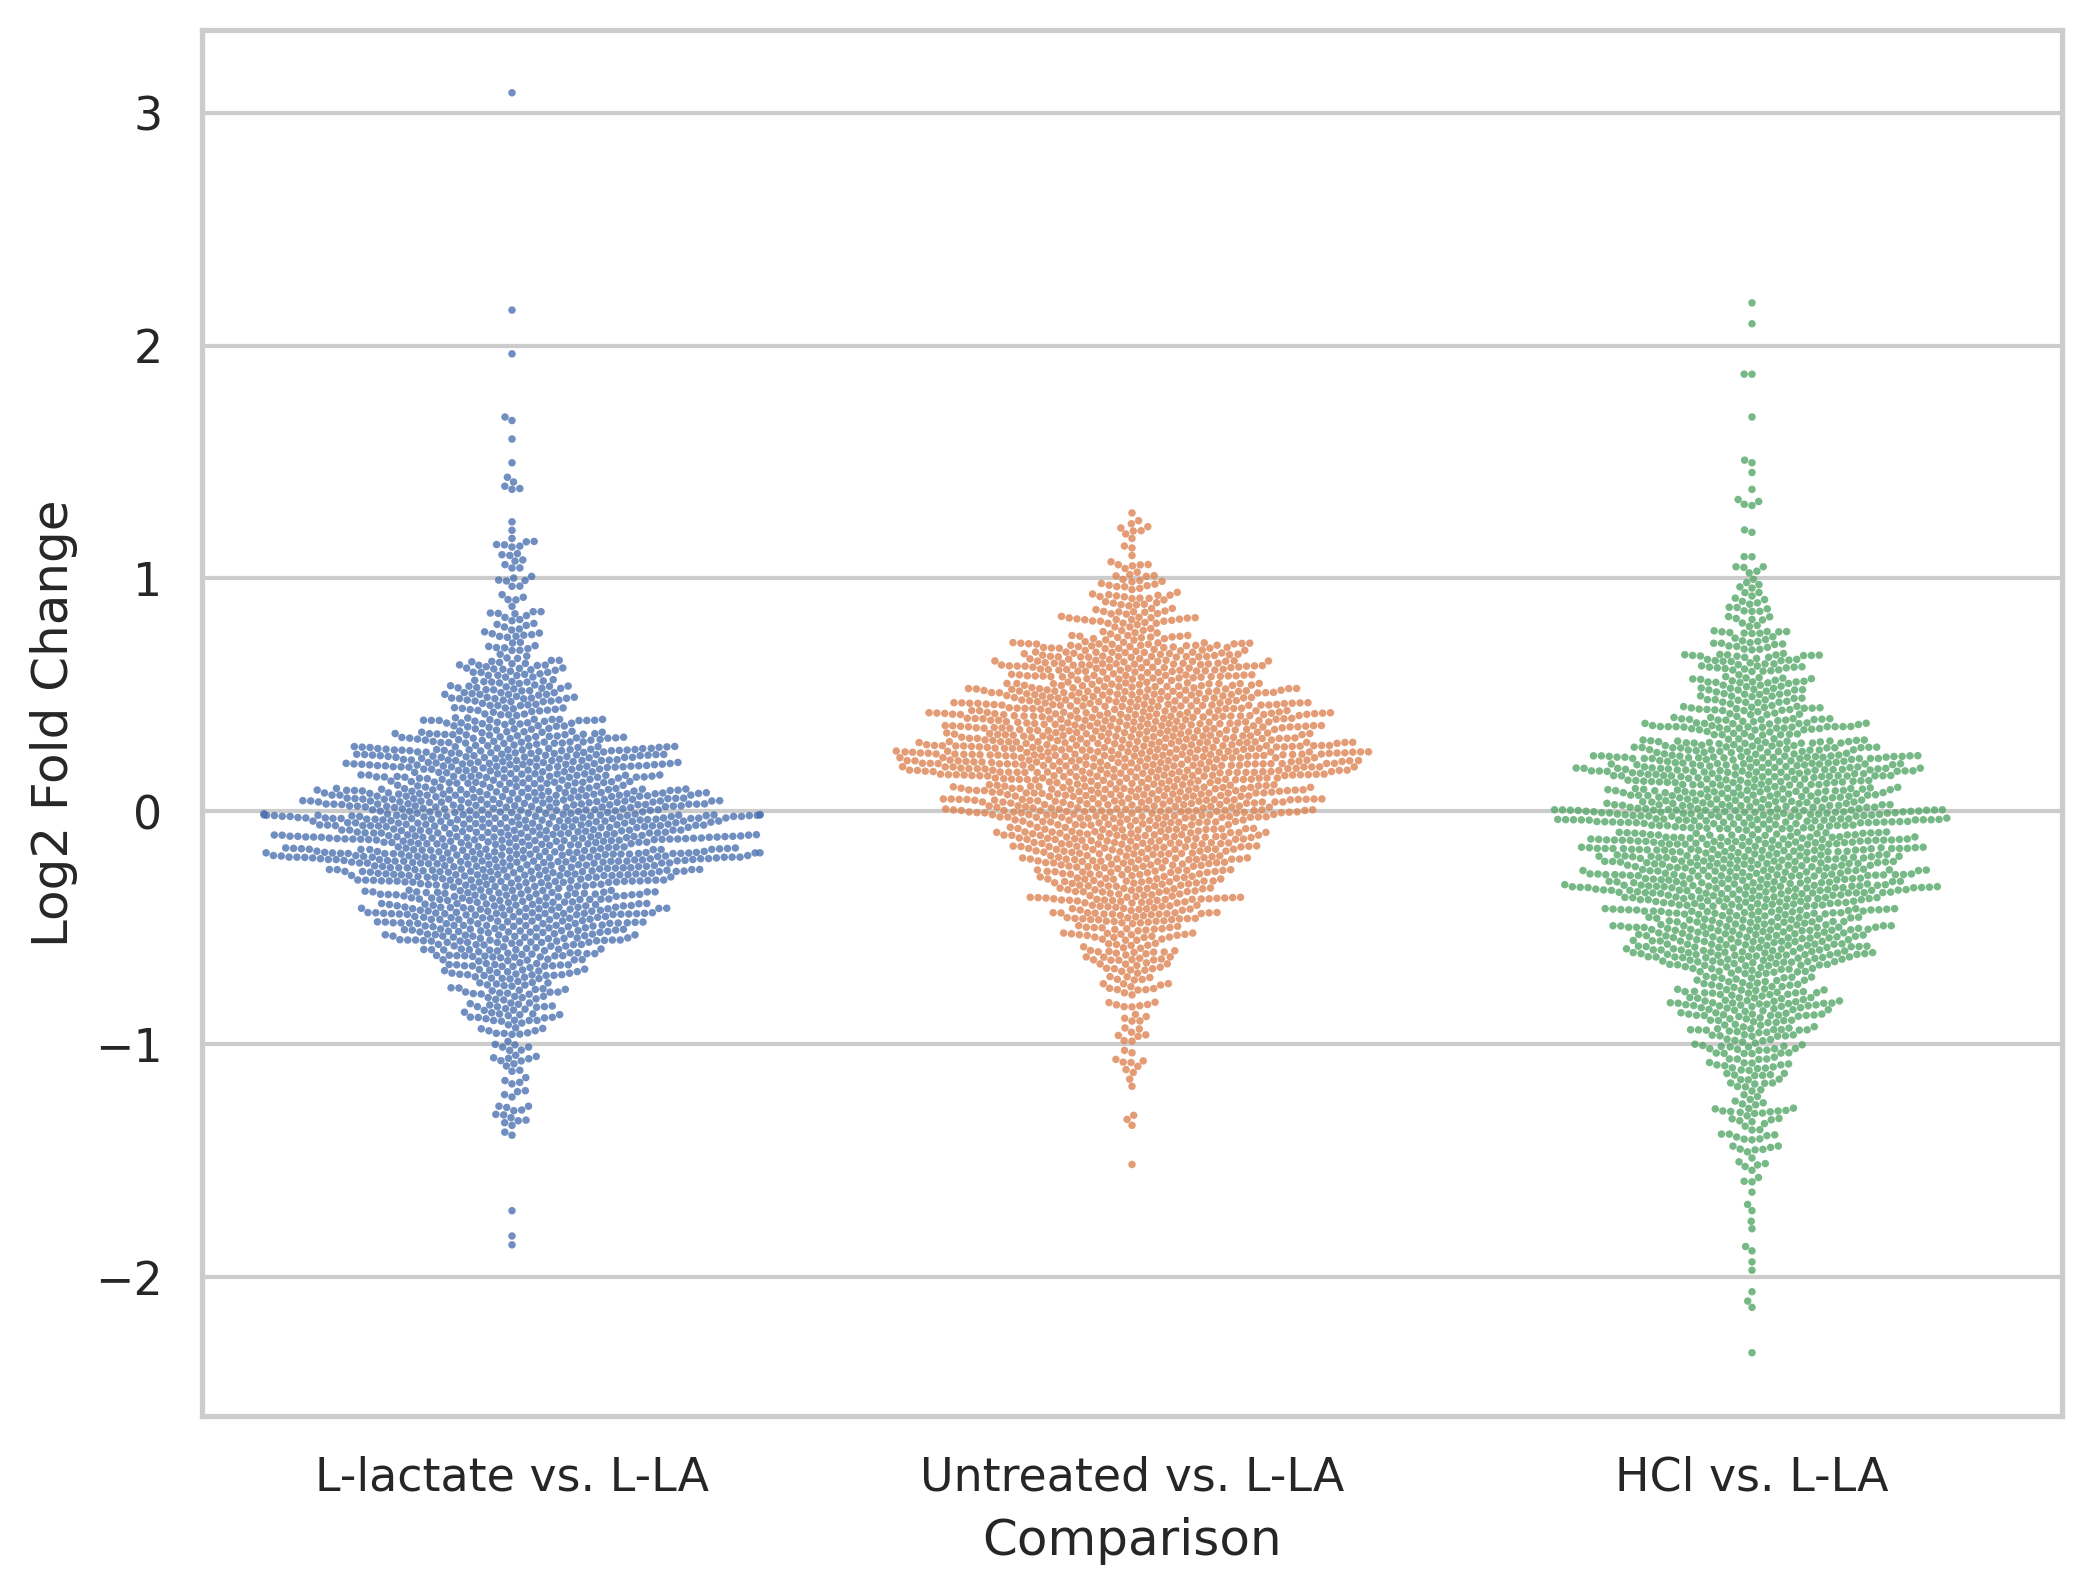

In [36]:
plt.figure(figsize=(8, 6), dpi=300)
pal = sns.color_palette()[0:]
sns.set_palette(pal)
sns.set(style="whitegrid")

sns.swarmplot(data=exp_df, x='Comparison', hue="base", y="log2fc", alpha=0.80, s=1.8, legend=False)

# Add labels and a title
plt.ylabel("Log2 Fold Change")
plt.show()

In [37]:
merged

Sample ID  Treatment Treatment Details  Barcode antibody  replicate  \
2         BJ_01  Untreated   Untreated rep 1    21403   05-746          0   
3         BJ_01  Untreated   Untreated rep 1    21403   05-746          1   
4         BJ_01  Untreated   Untreated rep 1    21403  06-2020          0   
5         BJ_01  Untreated   Untreated rep 1    21403  06-2020          1   
6         BJ_01  Untreated   Untreated rep 1    21403   06-519          0   
...         ...        ...               ...      ...      ...        ...   
48638     BJ_12        HCl         HCl rep 3    21414   sc-960          0   
48639     BJ_12        HCl         HCl rep 3    21414   sc-960          1   
48640     BJ_12        HCl         HCl rep 3    21414   sc-964          0   
48641     BJ_12        HCl         HCl rep 3    21414   sc-964          1   
48642     BJ_12        HCl         HCl rep 3    21414  sc-9898          0   

       Flag  Normalized          Target Name Target Uniprot ID Pan or P-Site  \
2         0         799           Histone H3            P84243            T3   
3         0         762           Histone H3            P84243            T3   
4         0        1566          Akt1 (PKBa)               NaN          Y474   
5         0        1702          Akt1 (PKBa)               NaN          Y474   
6         0        1166                CREB1            P16220          S133   
...     ...         ...                  ...               ...           ...   
48638     0        1196  MKK3 (MAP2K3; MEK3)            P46734  Pan-specific   
48639     0        1300  MKK3 (MAP2K3; MEK3)            P46734  Pan-specific   
48640     0         590  MKK4 (MAP2K4; MEK4)            P45985  Pan-specific   
48641     0         886  MKK4 (MAP2K4; MEK4)            P45985  Pan-specific   
48642     0         677                  Csk            P41240  Pan-specific   

                                  Title  isPan  
2                         Histone H3 T3  False  
3                         Histone H3 T3  False  
4                      Akt1 (PKBa) Y474  False  
5                      Akt1 (PKBa) Y474  False  
6                            CREB1 S133  False  
...                                 ...    ...  
48638  MKK3 (MAP2K3; MEK3) Pan-specific   True  
48639  MKK3 (MAP2K3; MEK3) Pan-specific   True  
48640  MKK4 (MAP2K4; MEK4) Pan-specific   True  
48641  MKK4 (MAP2K4; MEK4) Pan-specific   True  
48642                  Csk Pan-specific   True  

[40121 rows x 13 columns]

Text(0.5, 1.0, 'Correlation of Normalized values')

<Figure size 2400x1800 with 0 Axes>

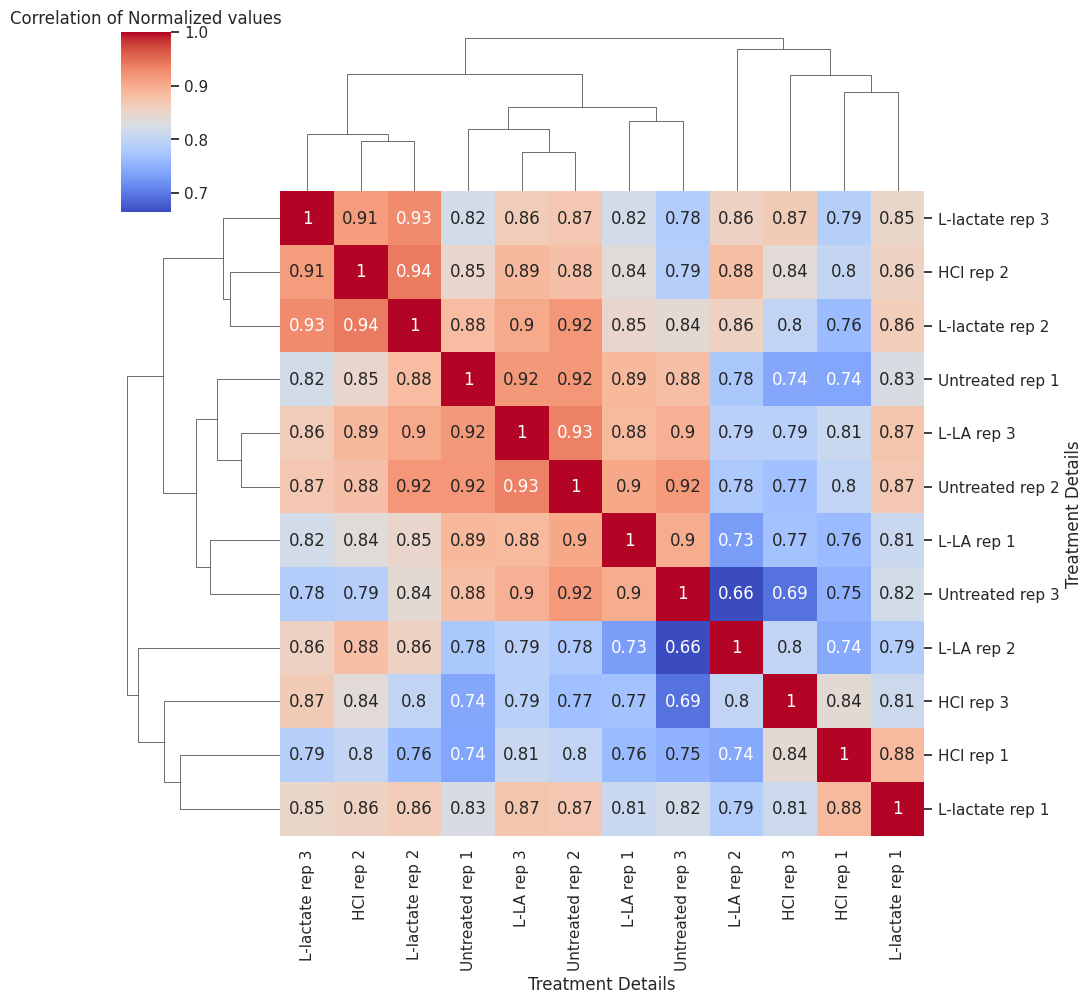

In [38]:
average_normalised = merged.groupby(['Title', 'Treatment Details'])['Normalized'].mean().reset_index().pivot_table(values='Normalized', columns='Treatment Details', index='Title')
plt.figure(figsize=(8, 6), dpi=300)
sns.clustermap(average_normalised.corr(), cmap="coolwarm", annot=True)
plt.title('Correlation of Normalized values')

Text(0.5, 1.0, 'Correlation of Log10 Normalized values')

<Figure size 2400x1800 with 0 Axes>

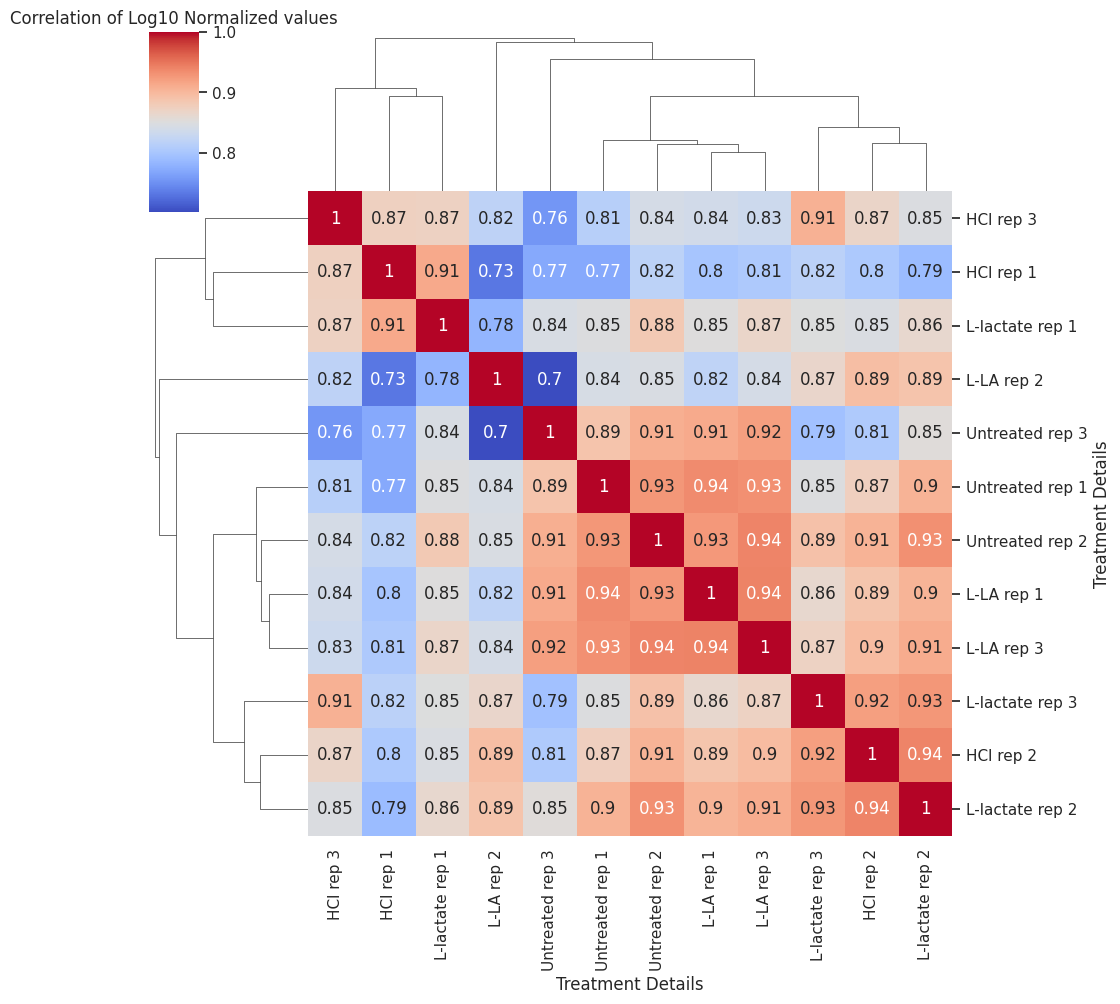

In [39]:
average_normalised = merged.groupby(['Title', 'Treatment Details'])['Normalized'].mean().reset_index().pivot_table(values='Normalized', columns='Treatment Details', index='Title')
plt.figure(figsize=(8, 6), dpi=300)
sns.clustermap(np.log10(average_normalised).corr(), cmap="coolwarm", annot=True)
plt.title('Correlation of Log10 Normalized values')

Text(0.5, 1.0, 'Correlation of Normalized values (averaged over treatment)')

<Figure size 2400x1800 with 0 Axes>

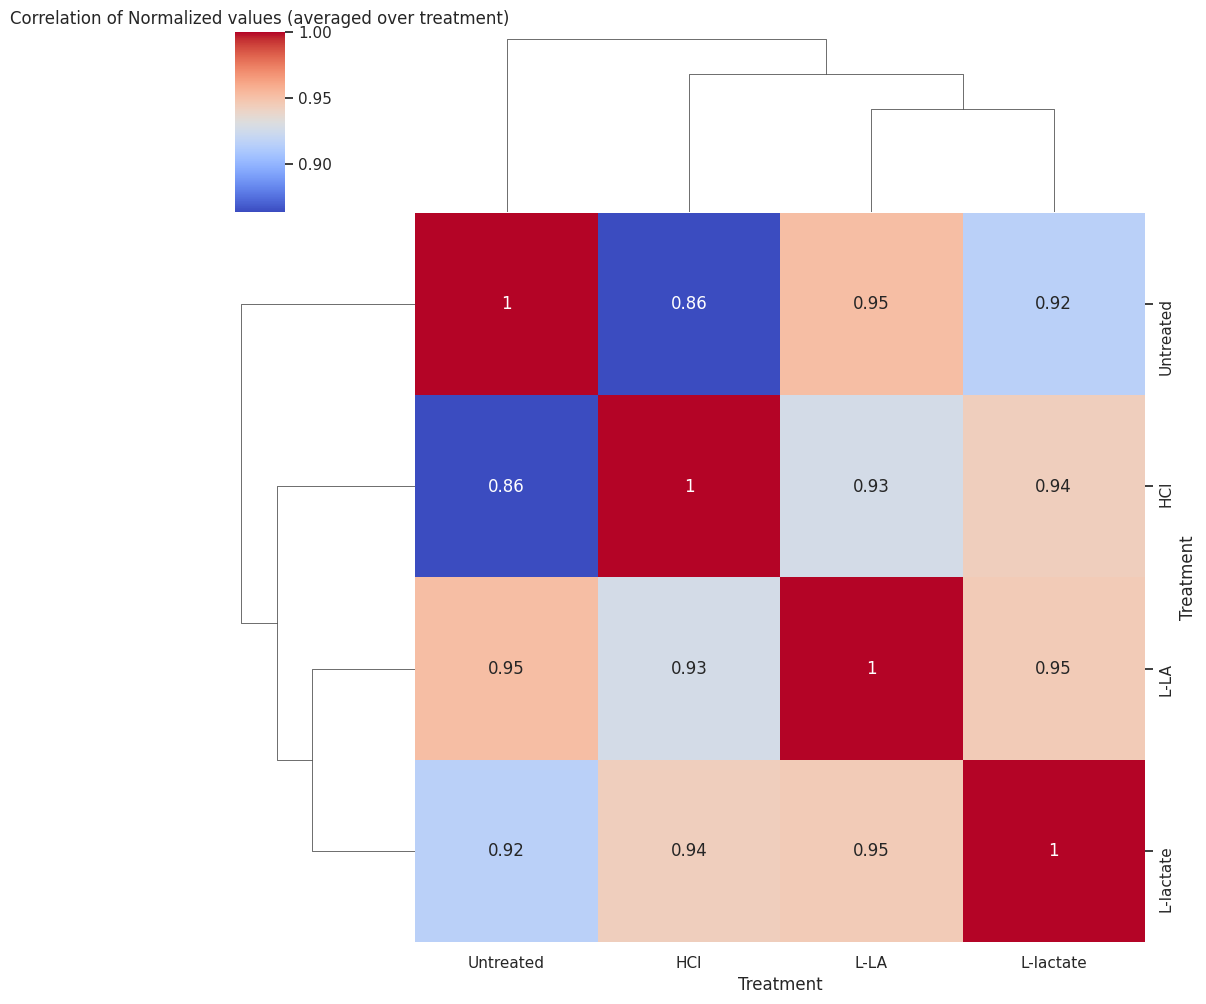

In [40]:
average_normalised = merged.groupby(['Title', 'Treatment'])['Normalized'].mean().reset_index().pivot_table(values='Normalized', columns='Treatment', index='Title')
plt.figure(figsize=(8, 6), dpi=300)
sns.clustermap((average_normalised).corr(), cmap="coolwarm", annot=True)
plt.title('Correlation of Normalized values (averaged over treatment)')

Text(0.5, 1.0, 'Correlation of Log10 Normalized values (averaged over treatment)')

<Figure size 2400x1800 with 0 Axes>

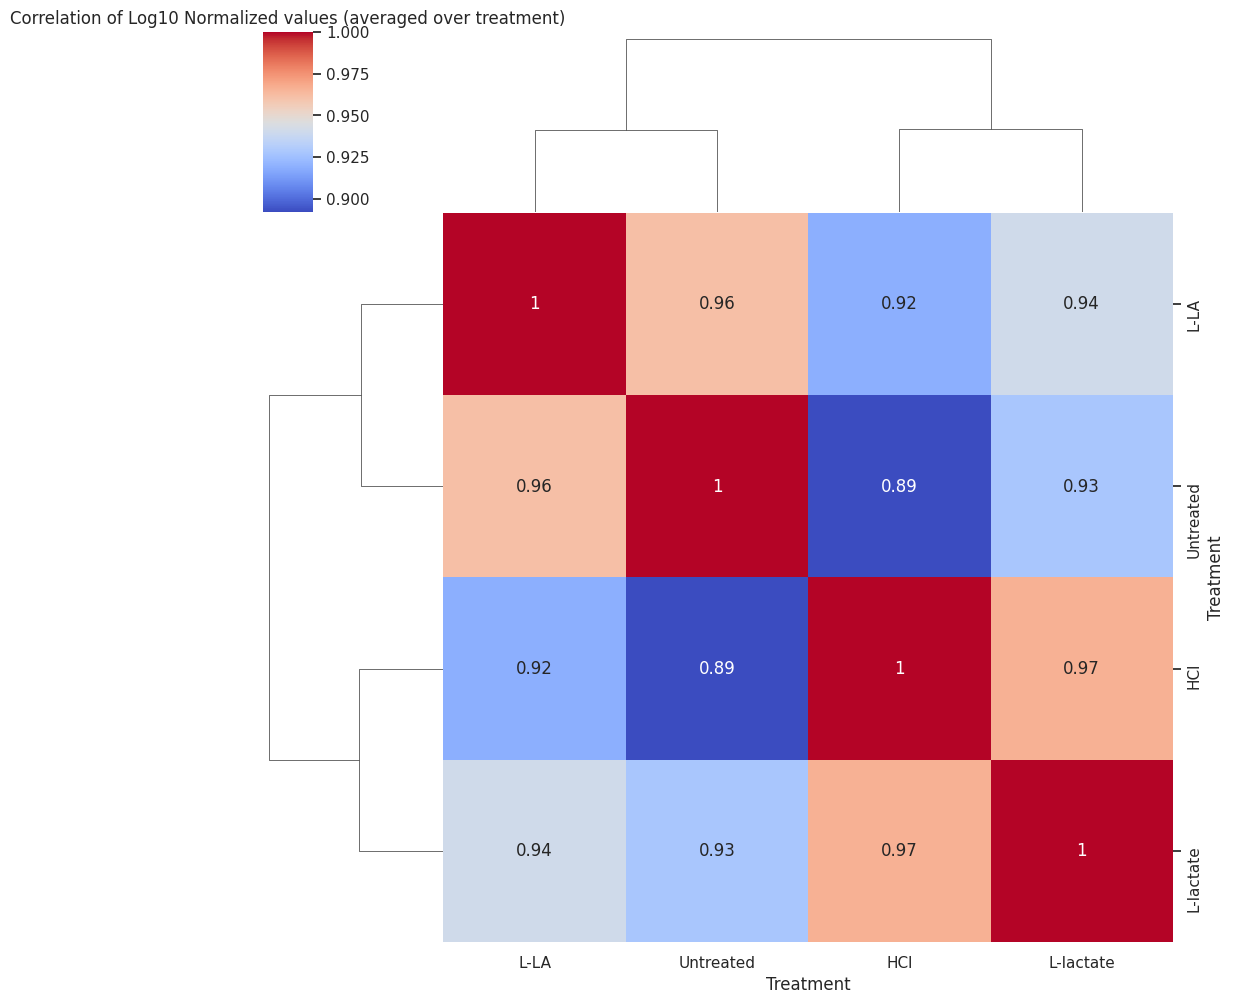

In [41]:
average_normalised = merged.groupby(['Title', 'Treatment'])['Normalized'].mean().reset_index().pivot_table(values='Normalized', columns='Treatment', index='Title')
plt.figure(figsize=(8, 6), dpi=300)
sns.clustermap(np.log10(average_normalised).corr(), cmap="coolwarm", annot=True)
plt.title('Correlation of Log10 Normalized values (averaged over treatment)')

<ipython-input-42-9d6e2de46f43>:1: FutureWarning:

In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.



Text(0.5, 1.0, 'Signal level clustering of L-lactic acid comparisons, pan specific signals included')

<Figure size 5000x4000 with 0 Axes>

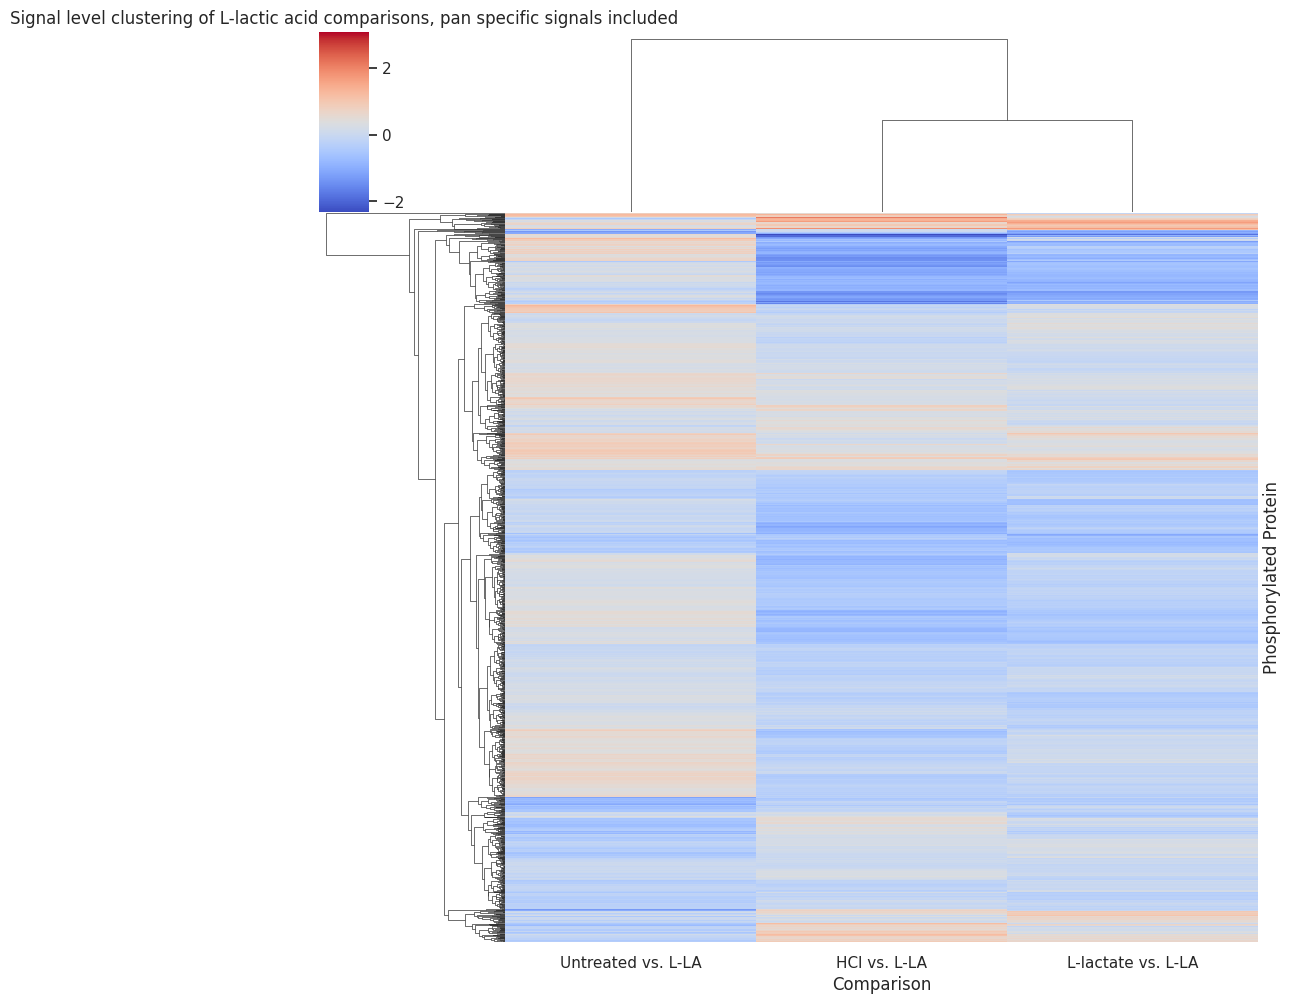

In [42]:
exp_piv = exp_df.groupby(["Comparison", "Title"])['log2fc'].mean().reset_index().pivot("Comparison", "Title", "log2fc").rename_axis("Phosphorylated Protein", axis=1)
plt.figure(figsize=(10, 8), dpi=500)

sns.clustermap(exp_piv.T, cmap='coolwarm', yticklabels=False)
plt.title('Signal level clustering of L-lactic acid comparisons, pan specific signals included')

# Embedding

In [43]:
# keys = comparisons.keys()
# setty = set([frozenset(x) for x in keys])
# smaller = [tuple(sorted(x, reverse=True)) for x in setty]

# comparisons_df = pd.DataFrame({" .vs ".join(key):G['log2fc'] for key,G in comparisons.items() if key in smaller})
# names_df = comparisons[list(comparisons.keys())[0]]
# comparisons_df.index = names_df['Target Name'] + ' ' + names_df['Pan or P-Site']
# comparisons_df

In [44]:
# from sklearn.decomposition import PCA

# transfomer = PCA(n_components=2)
# transformed_result = transfomer.fit_transform(comparisons_df.T)

# transformed_df = pd.DataFrame(transformed_result, columns=[f'Component {n+1}' for n in range(transformed_result.shape[1])])
# transformed_df['name'] = comparisons_df.columns
# px.scatter(transformed_df, x='Component 1', y='Component 2', hover_data=['name'])

In [45]:
# from sklearn.manifold import TSNE

# transfomer = TSNE(n_components=2, perplexity=5)
# transformed_result = transfomer.fit_transform(comparisons_df.T)

# transformed_df = pd.DataFrame(transformed_result, columns=[f'Component {n+1}' for n in range(transformed_result.shape[1])])
# transformed_df['name'] = comparisons_df.columns
# px.scatter(transformed_df, x='Component 1', y='Component 2', hover_data=['name'])

In [46]:
# from sklearn.decomposition import PCA

# transfomer = PCA(n_components=2)
# transformed_result = transfomer.fit_transform(comparisons_df)

# transformed_df = pd.DataFrame(transformed_result, columns=[f'Component {n+1}' for n in range(transformed_result.shape[1])])
# transformed_df['name'] = comparisons_df.index
# px.scatter(transformed_df, x='Component 1', y='Component 2', hover_data=['name'])

In [47]:
# from sklearn.manifold import TSNE

# transfomer = TSNE(n_components=2, perplexity=20, init='random')
# transformed_result = transfomer.fit_transform(comparisons_df)

# transformed_df = pd.DataFrame(transformed_result, columns=[f'Component {n+1}' for n in range(transformed_result.shape[1])])
# transformed_df['name'] = comparisons_df.index
# transformed_df['isPan'] = comparisons_df.index.str.contains('Pan')
# px.scatter(transformed_df, x='Component 1', y='Component 2', hover_data=['name'], color='isPan')

In [48]:
# import umap

# transfomer = umap.UMAP(n_components=2, densmap=True)
# transformed_result = transfomer.fit_transform(comparisons_df)

# transformed_df = pd.DataFrame(transformed_result, columns=[f'Component {n+1}' for n in range(transformed_result.shape[1])])
# transformed_df['name'] = comparisons_df.index
# transformed_df['isPan'] = comparisons_df.index.str.contains('Pan')
# px.scatter(transformed_df, x='Component 1', y='Component 2', hover_data=['name'], color='isPan')

In [49]:
merged['Title'] = merged['Target Name'] + ' ' + merged['Pan or P-Site']
pivd = merged[~merged['Pan or P-Site'].str.lower().str.contains('pan')].groupby(['Title', 'Treatment'])['Normalized'].mean().reset_index().pivot_table(values='Normalized', columns='Treatment', index='Title')

# pivd = merged[~merged['Pan or P-Site'].str.lower().str.contains('pan')].groupby(['antibody', 'Treatment'])['Normalized'].mean().reset_index().pivot_table(values='Normalized', columns='Treatment', index='antibody')
pivd = pivd[~pivd.isna().any(axis=1)]
pivd

Treatment                            HCl         L-LA    L-lactate  \
Title                                                                
4E-BP1 (PHAS1) T37+T46       2144.000000  1463.166667  1907.500000   
A6 (Twinfilin-1) Y309        5456.500000  4052.333333  4847.333333   
A6r (Twinfin-2) Y309         3657.500000  3031.000000  4104.666667   
ACACA (ACC1; ACCA) S80       5079.833333  5610.500000  4198.333333   
ACACB (ACC2) T1342           4481.166667  4440.666667  4464.833333   
...                                  ...          ...          ...   
p70S6K (S6Ka; RPS6KB1) S434  1503.166667  2134.166667  1735.666667   
p70S6K (S6Ka; RPS6KB1) T412  1712.833333  3231.000000  1877.666667   
p70S6KB (RPS6KB2) S423       6148.666667  3057.333333  5692.833333   
p73 (TP73) Y99               2670.500000  2594.000000  2249.500000   
snRNP 70 Y126                3343.500000  2488.666667  3025.333333   

Treatment                      Untreated  
Title                                     
4E-BP1 (PHAS1) T37+T46       1598.166667  
A6 (Twinfilin-1) Y309        3563.000000  
A6r (Twinfin-2) Y309         2757.500000  
ACACA (ACC1; ACCA) S80       5238.500000  
ACACB (ACC2) T1342           6161.666667  
...                                  ...  
p70S6K (S6Ka; RPS6KB1) S434  1194.500000  
p70S6K (S6Ka; RPS6KB1) T412  2082.333333  
p70S6KB (RPS6KB2) S423       2832.000000  
p73 (TP73) Y99               2261.833333  
snRNP 70 Y126                1929.333333  

[931 rows x 4 columns]

In [50]:
exp_pivd = exp_df.pivot_table(values='log2fc', columns='Comparison', index='Title')
exp_pivd

Comparison                          HCl vs. L-LA  L-lactate vs. L-LA  \
Title                                                                  
14-3-3 (KCIP-1) Pan-specific            0.175197            0.166615   
14-3-3-B-2 Pan-specific                 0.667150            0.611719   
14-3-3-G-2 Pan-specific                -0.120223           -0.180928   
14-3-3-S (YWHAS; SFN) Pan-specific     -0.907033           -0.221078   
14-3-3-T (YWHAQ) Pan-specific          -0.291677           -0.050509   
...                                          ...                 ...   
p70S6K (S6Ka; RPS6KB1) S434             0.505668            0.298183   
p70S6K (S6Ka; RPS6KB1) T412             0.915596            0.783040   
p70S6KB (RPS6KB2) S423                 -1.008000           -0.896873   
p73 (TP73) Y99                         -0.041931            0.205574   
snRNP 70 Y126                          -0.425986           -0.281721   

Comparison                          Untreated vs. L-LA  
Title                                                   
14-3-3 (KCIP-1) Pan-specific                 -0.300087  
14-3-3-B-2 Pan-specific                       0.723608  
14-3-3-G-2 Pan-specific                      -0.079698  
14-3-3-S (YWHAS; SFN) Pan-specific            0.201362  
14-3-3-T (YWHAQ) Pan-specific                -0.213498  
...                                                ...  
p70S6K (S6Ka; RPS6KB1) S434                   0.837266  
p70S6K (S6Ka; RPS6KB1) T412                   0.633780  
p70S6KB (RPS6KB2) S423                        0.110453  
p73 (TP73) Y99                                0.197686  
snRNP 70 Y126                                 0.367271  

[1384 rows x 3 columns]

In [57]:
# px.scatter_3d(data_frame=exp_pivd, x='Untreated vs. HCl', y='Untreated vs. L-LA', z='Untreated vs. L-lactate')

In [58]:
pivd

Treatment                            HCl         L-LA    L-lactate  \
Title                                                                
4E-BP1 (PHAS1) T37+T46       2144.000000  1463.166667  1907.500000   
A6 (Twinfilin-1) Y309        5456.500000  4052.333333  4847.333333   
A6r (Twinfin-2) Y309         3657.500000  3031.000000  4104.666667   
ACACA (ACC1; ACCA) S80       5079.833333  5610.500000  4198.333333   
ACACB (ACC2) T1342           4481.166667  4440.666667  4464.833333   
...                                  ...          ...          ...   
p70S6K (S6Ka; RPS6KB1) S434  1503.166667  2134.166667  1735.666667   
p70S6K (S6Ka; RPS6KB1) T412  1712.833333  3231.000000  1877.666667   
p70S6KB (RPS6KB2) S423       6148.666667  3057.333333  5692.833333   
p73 (TP73) Y99               2670.500000  2594.000000  2249.500000   
snRNP 70 Y126                3343.500000  2488.666667  3025.333333   

Treatment                      Untreated  
Title                                     
4E-BP1 (PHAS1) T37+T46       1598.166667  
A6 (Twinfilin-1) Y309        3563.000000  
A6r (Twinfin-2) Y309         2757.500000  
ACACA (ACC1; ACCA) S80       5238.500000  
ACACB (ACC2) T1342           6161.666667  
...                                  ...  
p70S6K (S6Ka; RPS6KB1) S434  1194.500000  
p70S6K (S6Ka; RPS6KB1) T412  2082.333333  
p70S6KB (RPS6KB2) S423       2832.000000  
p73 (TP73) Y99               2261.833333  
snRNP 70 Y126                1929.333333  

[931 rows x 4 columns]

In [59]:
# from sklearn.decomposition import PCA

# transfomer = PCA(n_components=2)
# transformed_result = transfomer.fit_transform(np.log(pivd))

# transformed_df = pd.DataFrame(transformed_result, columns=[f'Component {n+1}' for n in range(transformed_result.shape[1])])
# transformed_df['name'] = pivd.index
# px.scatter(transformed_df, x='Component 1', y='Component 2', hover_data=['name'])

# Go Analysis


## Install


In [60]:
!pip install -q goatools  # Install the goatools package

# Get required Go-term library and gene2go library
# !wget -q http://geneontology.org/ontology/go-basic.obo
!wget -q http://geneontology.org/ontology/go.obo  # Download the Gene Ontology file in OBO format
!wget -q ftp://ftp.ncbi.nlm.nih.gov/gene/DATA/gene2go.gz  # Download the gene2go file from the NCBI FTP server

import re  # Import the re module for regular expressions
import time  # Import the time module for working with time
import json  # Import the json module for working with JSON data
import zlib  # Import the zlib module for data compression and decompression
import requests  # Import the requests module for making HTTP requests
import pandas as pd  # Import the Pandas library for data manipulation and analysis

from xml.etree import ElementTree  # Import the ElementTree module for working with XML data
from urllib.parse import urlparse, parse_qs, urlencode  # Import various modules for working with URLs
from requests.adapters import HTTPAdapter, Retry  # Import the HTTPAdapter and Retry modules for handling HTTP requests
from goatools.obo_parser import GODag  # Import the GODag module from the goatools package
from goatools.base import download_ncbi_associations  # Import the download_ncbi_associations module from the goatools package
from __future__ import print_function  # Import the print_function from the future module
from goatools.anno.genetogo_reader import Gene2GoReader  # Import the Gene2GoReader module from the goatools package
from goatools.goea.go_enrichment_ns import GOEnrichmentStudyNS  # Import the GOEnrichmentStudyNS module from the goatools package

def goe_analysis(df_for_goa, uniprot_ids, log2fc_col):

  def convert_uniprots(list_of_ids):
    # Function to Query the uniprot API to convert Uniprot IDs to Gene IDs then to return a df containing the Uniprot ID and Gene ID as columns
    POLLING_INTERVAL = 3
    API_URL = "https://rest.uniprot.org"

    retries = Retry(total=5, backoff_factor=0.25, status_forcelist=[500, 502, 503, 504])
    session = requests.Session()
    session.mount("https://", HTTPAdapter(max_retries=retries))

    def check_response(response):
        try:
            response.raise_for_status()
        except requests.HTTPError:
            print(response.json())
            raise

    def submit_id_mapping(from_db, to_db, ids):
        request = requests.post(
            f"{API_URL}/idmapping/run",
            data={"from": from_db, "to": to_db, "ids": ",".join(ids)},
        )
        check_response(request)
        return request.json()["jobId"]

    def get_next_link(headers):
        re_next_link = re.compile(r'<(.+)>; rel="next"')
        if "Link" in headers:
            match = re_next_link.match(headers["Link"])
            if match:
                return match.group(1)

    def check_id_mapping_results_ready(job_id):
        while True:
            request = session.get(f"{API_URL}/idmapping/status/{job_id}")
            check_response(request)
            j = request.json()
            if "jobStatus" in j:
                if j["jobStatus"] == "RUNNING":
                    print(f"Retrying in {POLLING_INTERVAL}s")
                    time.sleep(POLLING_INTERVAL)
                else:
                    raise Exception(j["jobStatus"])
            else:
                return bool(j["results"] or j["failedIds"])

    def get_batch(batch_response, file_format, compressed):
        batch_url = get_next_link(batch_response.headers)
        while batch_url:
            batch_response = session.get(batch_url)
            batch_response.raise_for_status()
            yield decode_results(batch_response, file_format, compressed)
            batch_url = get_next_link(batch_response.headers)

    def combine_batches(all_results, batch_results, file_format):
        if file_format == "json":
            for key in ("results", "failedIds"):
                if key in batch_results and batch_results[key]:
                    all_results[key] += batch_results[key]
        elif file_format == "tsv":
            return all_results + batch_results[1:]
        else:
            return all_results + batch_results
        return all_results

    def get_id_mapping_results_link(job_id):
        url = f"{API_URL}/idmapping/details/{job_id}"
        request = session.get(url)
        check_response(request)
        return request.json()["redirectURL"]

    def decode_results(response, file_format, compressed):
        if compressed:
            decompressed = zlib.decompress(response.content, 16 + zlib.MAX_WBITS)
            if file_format == "json":
                j = json.loads(decompressed.decode("utf-8"))
                return j
            elif file_format == "tsv":
                return [line for line in decompressed.decode("utf-8").split("\n") if line]
            elif file_format == "xlsx":
                return [decompressed]
            elif file_format == "xml":
                return [decompressed.decode("utf-8")]
            else:
                return decompressed.decode("utf-8")
        elif file_format == "json":
            return response.json()
        elif file_format == "tsv":
            return [line for line in response.text.split("\n") if line]
        elif file_format == "xlsx":
            return [response.content]
        elif file_format == "xml":
            return [response.text]
        return response.text

    def print_progress_batches(batch_index, size, total):
        n_fetched = min((batch_index + 1) * size, total)
        print(f"Fetched: {n_fetched} / {total}")

    def get_id_mapping_results_search(url):
        parsed = urlparse(url)
        query = parse_qs(parsed.query)
        file_format = query["format"][0] if "format" in query else "json"
        if "size" in query:
            size = int(query["size"][0])
        else:
            size = 500
            query["size"] = size
        compressed = (
            query["compressed"][0].lower() == "true" if "compressed" in query else False
        )
        parsed = parsed._replace(query=urlencode(query, doseq=True))
        url = parsed.geturl()
        request = session.get(url)
        check_response(request)
        results = decode_results(request, file_format, compressed)
        total = int(request.headers["x-total-results"])
        print_progress_batches(0, size, total)
        for i, batch in enumerate(get_batch(request, file_format, compressed), 1):
            results = combine_batches(results, batch, file_format)
            print_progress_batches(i, size, total)
        if file_format == "xml":
            return merge_xml_results(results)
        return results

    job_id = submit_id_mapping(
        from_db="UniProtKB_AC-ID", to_db="GeneID", ids=list_of_ids
    )
    if check_id_mapping_results_ready(job_id):
        link = get_id_mapping_results_link(job_id)
        results = get_id_mapping_results_search(link)

    # Convert the resulting dictionary into a df
    gene_ids =[]
    uniprot_ids =[]

    for item in results['results']:
        uniprot_ids.append(item['from'])
        gene_ids.append(item['to'])

    df = pd.DataFrame([gene_ids, uniprot_ids]).T
    df.columns = ['GeneID', 'UniprotID']

    return df

  def get_geneIDs_of_quartiles(df_for_goa, uniprot_ids, log2fc_col):

    # Get Gene IDs for KAM2000 antibody targets
    gene_uniprot_ids_pop = convert_uniprots(list_of_ids=list(set(df_for_goa[uniprot_ids].astype('str'))))
    gene_uniprot_ids_pop['GeneID'] = gene_uniprot_ids_pop['GeneID'].astype('float64')


    df = pd.DataFrame(list(df_for_goa[uniprot_ids].astype('str')), columns=['UniprotID'])
    gene_uniprot_ids_pop = gene_uniprot_ids_pop.merge(df, on ='UniprotID', how='right')
    geneids_pop = gene_uniprot_ids_pop['GeneID']#.astype('float64') # Define the GeneID population list, note this needs to be a float to work!

    # Get Gene IDs of the study population of interest, here we get Q75 and Q25 associated Log2FCs IDs

    # Top
    # display(df_for_goa)
    # raise 1
    selected_names_top = list(df_for_goa[uniprot_ids][df_for_goa['significant']].astype('str'))
    gene_uniprot_ids_study_top = convert_uniprots(list(set(selected_names_top)))
    df = pd.DataFrame(selected_names_top, columns = ['UniprotID'])

    gene_uniprot_ids_study_top = gene_uniprot_ids_study_top.merge(df, on = 'UniprotID', how = 'right')
    geneids_study_top = gene_uniprot_ids_study_top['GeneID'].astype('float64')

    # # Inter - NOT WORKING
    # gene_uniprot_ids_study_inter = convert_uniprots(list(set(df_for_goa[uniprot_ids][df_for_goa[log2fc_col] <= df_for_goa[log2fc_col].quantile(q=0.75)].astype('str')) \
    #                                                      & set(df_for_goa[uniprot_ids][df_for_goa[log2fc_col] >= df_for_goa[log2fc_col].quantile(q=0.25)].astype('str'))))

    # # Creating the mask for the condition
    # mask = (df_for_goa[log2fc_col] <= df_for_goa[log2fc_col].quantile(q=0.75)) & \
    #       (df_for_goa[log2fc_col] >= df_for_goa[log2fc_col].quantile(q=0.25))

    # filtered_uniprot_ids = df_for_goa.loc[mask, uniprot_ids] # Applying the mask to get the desired rows from 'uniprot_ids' column
    # df = pd.DataFrame(filtered_uniprot_ids.astype('str'), columns=['UniprotID']) # Creating a new dataframe from this series

    # gene_uniprot_ids_study_inter = gene_uniprot_ids_study_inter.merge(df, on = 'UniprotID', how = 'right')
    # geneids_study_inter = gene_uniprot_ids_study_inter['GeneID'].astype('float64')

    # Bottom
    # selected_names_top = list(df_for_goa[uniprot_ids][df_for_goa[log2fc_col] <= df_for_goa[log2fc_col].quantile(q=0.25)].astype('str'))
    # gene_uniprot_ids_study_bottom = convert_uniprots(list(set(selected_names_top)))
    # df = pd.DataFrame(selected_names_top, columns = ['UniprotID'])

    # gene_uniprot_ids_study_bottom = gene_uniprot_ids_study_bottom.merge(df, on = 'UniprotID', how = 'right')
    # geneids_study_bottom = gene_uniprot_ids_study_bottom['GeneID'].astype('float64')

    # return geneids_pop, geneids_study_top, geneids_study_bottom, gene_uniprot_ids_pop
    return geneids_pop, geneids_study_top, gene_uniprot_ids_pop

  # def prep_goe_analysis(geneids_pop, geneids_study_top, geneids_study_bottom):
  def prep_goe_analysis(geneids_pop, geneids_study_top):

    fin_gene2go = download_ncbi_associations()
    # obodag = GODag("go-basic.obo")
    obodag = GODag("go.obo")
    # Read NCBI's gene2go. Store annotations in a list of namedtuples
    objanno = Gene2GoReader(fin_gene2go, taxids=[9606])

    # Get namespace2association where:
    #    namespace is:
    #        BP: biological_process
    #        MF: molecular_function
    #        CC: cellular_component

    #    assocation is a dict:
    #        key: NCBI GeneID
    #        value: A set of GO IDs associated with that gene

    ns2assoc = objanno.get_ns2assc()

    # for nspc, id2gos in ns2assoc.items():
        # print("{NS} {N:,} annotated human genes".format(NS=nspc, N=len(id2gos)))

    # Create goeaobj with parameters of use

    goeaobj = GOEnrichmentStudyNS(
        geneids_pop,              # List of genes possible in your study
        ns2assoc,                 # Namespace2association
        obodag,                   # Ontologies
        propagate_counts = False, # Propagate counts up GO hierarchy
        alpha=0.05,               # Significance level
        methods=["fdr_bh"])       # Correction method

    GO_items = []

    temp = goeaobj.ns2objgoea['BP'].assoc
    for item in temp:
        GO_items += temp[item]

    temp = goeaobj.ns2objgoea['CC'].assoc
    for item in temp:
        GO_items += temp[item]

    temp = goeaobj.ns2objgoea['MF'].assoc
    for item in temp:
        GO_items += temp[item]

    return goeaobj, GO_items

  # This function takes in two arguments: a list of test genes and a string representing the name of the study
  def go_it(test_genes, study):
    # Print the number of test genes passed into the function
    print(f'input genes: {len(test_genes)}')

    # Run Gene Ontology Enrichment Analysis (GOEA) on the test_genes using goeaobj, and store the results in goea_results_all
    goea_results_all = goeaobj.run_study(test_genes, prt=None)

    # Filter goea_results_all to only include significant results (p_fdr_bh < 0.05), and store them in goea_results_sig
    goea_results_sig = [r for r in goea_results_all if r.p_fdr_bh < 0.001]

    # Create a DataFrame called GO using goea_results_sig
    GO = pd.DataFrame(list(map(lambda x: [x.GO,
                                          x.goterm.name,
                                          x.goterm.namespace,
                                          x.p_uncorrected,
                                          x.p_fdr_bh,
                                          x.ratio_in_study[0],
                                          x.ratio_in_study[1],
                                          GO_items.count(x.GO),
                                          list(x.study_items)],

                                goea_results_sig)),

                      columns = ['GO', 'term', 'class', 'p', 'p_corr', 'n_genes', 'n_study','n_go', 'study_genes'])

    # Filter out GO terms with less than 2 genes
    GO = GO[GO.n_genes > 1]

    # Add a new column to GO called 'n_genes/n_go', which is the ratio of the number of genes annotated to the GO term to the total number of genes in that GO term
    GO['n_genes/n_go'] = GO.n_genes/GO.n_go

    # Add a new column to GO called 'study_pop_assessed', which contains the name of the study passed in as an argument
    GO['study_pop_assessed'] = study

    # Return the DataFrame GO and the list of significant GOEA results goea_results_sig
    return GO, goea_results_sig


  #ENTER HERE
  # dont look at quartiles of fc, lookat p<0.05 vs. everything.

  # Get gene IDs of quartiles of a DataFrame
  # geneids_pop, geneids_study_top, geneids_study_bottom, gene_uniprot_ids_pop = get_geneIDs_of_quartiles(df_for_goa, uniprot_ids, log2fc_col)
  geneids_pop, geneids_study_top, gene_uniprot_ids_pop = get_geneIDs_of_quartiles(df_for_goa, uniprot_ids, log2fc_col)

  # Prepare for GOEA by creating a GeneOntologyEnrichmentStudy object called goeaobj and a set of GO terms called GO_items
  goeaobj, GO_items = prep_goe_analysis(geneids_pop, geneids_study_top)

  # Run GOEA on the test genes in the three quartiles (top, inter, and bottom) and store the results and significant GOEA results in separate variables for each quartile
  goea_results_sig_top, goea_sig_top = go_it(test_genes = geneids_study_top, study = '>Q3')
  # goea_results_sig_inter, goea_sig_inter = go_it(test_genes = geneids_study_inter, study = 'IQR')
  # goea_results_sig_bottom, goea_sig_bottom = go_it(test_genes = geneids_study_bottom, study = '<Q1')

  # Concatenate the significant GOEA results for all three quartiles into a single DataFrame called goea_results, and drop duplicate rows based on the 'GO' column
  # goea_results = pd.concat([goea_results_sig_top, goea_results_sig_bottom])
  goea_results = goea_results_sig_top
  goea_results = goea_results.drop_duplicates(subset = 'GO', keep = False)

  return goea_results, gene_uniprot_ids_pop, goea_sig_top, geneids_pop

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.8/15.8 MB 56.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.8/154.8 kB 18.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [61]:
# goea_results_HCl, gene_uniprot_ids_pop_HCl, goea_results_sig_HCl, geneids_pop_HCl = goe_analysis(uniprots_df[uniprots_df['Comparison'] == 'Untreated vs. HCl'], 'Target Uniprot ID', log2fc_col='log2fc')

## Analysis

In [62]:
exp_df
# goe_analysis()

antibody                    Target Name Target Uniprot ID Pan or P-Site  \
0      05-746                     Histone H3            P84243            T3   
1     06-2020                    Akt1 (PKBa)               NaN          Y474   
2      06-519                          CREB1            P16220          S133   
3      06-570  H3F3A (HIST1H3A; Histone H3A)            P84243           S10   
4      07-021                         PDGFRB            P09619          Y716   
...       ...                            ...               ...           ...   
1618  sc-9051                  DNAPK (PRKDC)            P78527  Pan-specific   
1619  sc-9085                    TBK1 (IKKd)            Q9UHD2  Pan-specific   
1620   sc-932                     FAK (PTK2)            Q05397  Pan-specific   
1621   sc-959            MKK3 (MAP2K3; MEK3)            P46734  Pan-specific   
1622   sc-960            MKK3 (MAP2K3; MEK3)            P46734  Pan-specific   

        log2fc      pval  N_base  N_exp  significant       base   exp  \
0    -0.415803  0.089823       5      6        False  L-lactate  L-LA   
1    -0.402250  0.077179       6      6        False  L-lactate  L-LA   
2    -1.203357  0.031954       6      6         True  L-lactate  L-LA   
3    -0.026230  0.944519       6      6        False  L-lactate  L-LA   
4     0.120860  0.791295       4      6        False  L-lactate  L-LA   
...        ...       ...     ...    ...          ...        ...   ...   
1618 -0.059525  0.772282       6      6        False        HCl  L-LA   
1619  0.306433  0.426795       4      6        False        HCl  L-LA   
1620 -0.531523  0.097650       6      6        False        HCl  L-LA   
1621  0.058414  0.851136       3      6        False        HCl  L-LA   
1622  0.468941  0.154862       6      6        False        HCl  L-LA   

                                  Title          Comparison outlier  isPan  \
0                         Histone H3 T3  L-lactate vs. L-LA   False  False   
1                      Akt1 (PKBa) Y474  L-lactate vs. L-LA   False  False   
2                            CREB1 S133  L-lactate vs. L-LA   False  False   
3     H3F3A (HIST1H3A; Histone H3A) S10  L-lactate vs. L-LA   False  False   
4                           PDGFRB Y716  L-lactate vs. L-LA   False  False   
...                                 ...                 ...     ...    ...   
1618         DNAPK (PRKDC) Pan-specific        HCl vs. L-LA   False   True   
1619           TBK1 (IKKd) Pan-specific        HCl vs. L-LA   False   True   
1620            FAK (PTK2) Pan-specific        HCl vs. L-LA   False   True   
1621   MKK3 (MAP2K3; MEK3) Pan-specific        HCl vs. L-LA   False   True   
1622   MKK3 (MAP2K3; MEK3) Pan-specific        HCl vs. L-LA   False   True   

        col  
0     white  
1     white  
2     white  
3     white  
4     white  
...     ...  
1618    red  
1619    red  
1620    red  
1621    red  
1622    red  

[4869 rows x 16 columns]

In [63]:
uniprots_df = exp_df[~exp_df['Target Uniprot ID'].isna()]

In [64]:
uniprots_df['Comparison'].unique()

array(['L-lactate vs. L-LA', 'Untreated vs. L-LA', 'HCl vs. L-LA'],
      dtype=object)

In [ ]:
goea_results_HCl, gene_uniprot_ids_pop_HCl, goea_results_sig_HCl, geneids_pop_HCl = goe_analysis(uniprots_df[uniprots_df['Comparison'] == 'HCl vs. L-LA'], 'Target Uniprot ID', log2fc_col='log2fc')
goea_results_Lactate, gene_uniprot_ids_pop_Lactate, goea_results_sig_Lactate, geneids_pop_Lactate = goe_analysis(uniprots_df[uniprots_df['Comparison'] == 'L-lactate vs. L-LA'], 'Target Uniprot ID', log2fc_col='log2fc')
goea_results_LA, gene_uniprot_ids_pop_LA, goea_results_sig_LA, geneids_pop_LA = goe_analysis(uniprots_df[uniprots_df['Comparison'] == 'Untreated vs. L-LA'], 'Target Uniprot ID', log2fc_col='log2fc')

Retrying in 3s
Fetched: 500 / 813
Fetched: 813 / 813
Retrying in 3s
Fetched: 111 / 111
$ get ftp://ftp.ncbi.nlm.nih.gov/gene/DATA/gene2go.gz
FTP RETR ftp.ncbi.nlm.nih.gov gene/DATA gene2go.gz -> gene2go.gz
$ gunzip gene2go.gz


In [ ]:
import math
import matplotlib.font_manager as font_manager
from matplotlib.colors import ListedColormap

# Define a function that creates a bar plot to visualize Gene Ontology Enrichment Analysis results
def barplot_GOEA(dataset, hue, title = 'GO Enrichment Analysis'):

  # Define a dictionary that maps quartile names to colors
  colour_dict = {'>Q3': '#FF7F00',
                '<Q1': '#20B2AA'}

  # Extract keys and values of the colour dictionary and store them in separate lists
  values = list(colour_dict.keys())
  colors = list(colour_dict.values())

  # Create a colormap using the colors from the colour dictionary
  cmap = ListedColormap(colors)

  # Calculate the number of bars to be plotted
  n_bars = len(dataset['term'].unique())

  # Calculate the height of the figure based on the number of bars to be plotted
  fig_height = 0.5 + (n_bars * 0.45)

  # Create a matplotlib figure and axis object with dynamically calculated size
  fig, ax = plt.subplots(figsize = (10, fig_height), dpi=300)

  # Create a bar plot using the Seaborn barplot function
  ax = sns.barplot(data = dataset,
                  #  legend=False,
                   x = 'n_genes/n_go',  # Set the x-axis as the gene ratio column
                   y = 'term',  # Set the y-axis as the GO term column
                   hue=hue,  # Group the data by quartiles using the hue parameter
                   palette=colour_dict,  # Use the colour dictionary to set the colours of the bars
                   dodge=False,  # Align the bars of each hue
                   edgecolor='black') # Draw black lines around the bars

  # Set the x-axis and y-axis labels using the set_xlabel and set_ylabel functions
  ax.set_xlabel("Gene Ratio", fontsize=20)
  ax.set_ylabel("Go Term", fontsize=20)

  ax.set_title(title, fontsize=20) # Set title
  ax.set_xlim(0, 1)  # Set the y-axis limit to 0-1

  ax.legend().remove()
  # Create a legend using the legend function
  # legend = ax.legend(bbox_to_anchor=(0.62, 1),
  #                    loc='upper left',
  #                    title = 'Quartile Assessed',
  #                    fontsize=20)

  # Set the font size of the legend title to 20 using the get_title and set_fontsize functions
  # legend.get_title().set_fontsize(20)

In [ ]:
"print('goea_results_HCl', len(goea_results_HCl))
print('goea_results_Lactate', len(goea_results_Lactate))
print('goea_results_LA', len(goea_results_LA))

In [ ]:
#hist the p_corr, decide a cutoff

barplot_GOEA(dataset = goea_results_HCl[goea_results_HCl['p_corr'] < 1].sort_values('p_corr'), hue ='study_pop_assessed', title = 'HCl vs L-LA Treatment GO Enrichment')

In [ ]:
barplot_GOEA(dataset = goea_results_Lactate[goea_results_Lactate['p_corr'] < 1].sort_values('p_corr')[0:20], hue ='study_pop_assessed', title = 'Lactate vs. L-LA Treatment GO Enrichment')

In [ ]:
barplot_GOEA(dataset = goea_results_LA[goea_results_LA['p_corr'] < 1].sort_values('p_corr')[0:20], hue ='study_pop_assessed', title = 'Lactic Acid Treatment GO Enrichment')

In [ ]:
# import necessary modules
from matplotlib.colors import LogNorm, Normalize

# merge three dataframes on their 'GO', 'term', and 'class' columns with the outer join method
merger = pd.merge(goea_results_HCl[['GO','term','class', 'p_corr']], goea_results_Lactate[['GO','term','class','p_corr']], on=['GO','term','class',], how='outer')
merger = pd.merge(merger, goea_results_LA[['GO','term','class', 'p_corr']], on=['GO','term','class'], how='outer').sort_values(['class','term'])

# rename columns of the merged dataframe
merger = merger.rename(columns={'p_corr_x':'HCl', 'p_corr_y':'Lactate', 'p_corr':'Untreated'})
merger

# set the colormap for the heatmap to crest_r and the color for missing values to gainsboro
cmap = sns.cm.crest_r
cmap.set_bad('gainsboro')


# # create a heatmap using the merged dataframe
fig, ax = plt.subplots(figsize=(10, 20))
plt.title('GO Term Enrichment for Comparison with L-LA')
ax1 = sns.heatmap(
      merger[['HCl','Lactate','Untreated']].fillna(0),
      yticklabels=merger['term'],
      cmap=cmap,
      square=True,
      linewidths=1,
      vmin=0.01, vmax=0.05,
      cbar_kws={'label': 'p value', 'shrink': 0.2, 'location':'right', "pad": 0.2},
      norm=LogNorm()
    )

# # set the tick parameters and labels for the x-axis
# ax1.tick_params(axis='x', labeltop=True, labelbottom=False)
# _ = ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, horizontalalignment='left')

In [ ]:
from goatools.godag_plot import plot_gos, plot_results, plot_goid2goobj
from IPython.display import Image


plot_results('go_sig_network_HCl_{NS}.png', goea_results_sig_HCl)
plot_results("go_sig_network_Lactate_{NS}.png", goea_results_sig_Lactate)
plot_results("go_sig_network_LLA_{NS}.png", goea_results_sig_LA)

# Mappings!

## Mappings setup

In [57]:
import pandas as pd
import pandas as pd
import numpy as np
import networkx as nx
import itertools
import random
from tqdm import tqdm
from itertools import chain

pd.options.mode.chained_assignment = None  # default='warn'

In [58]:
def DatasetOrganisation(Data, LowSignalCutOff, ErrorThreshold):
    # Rename columns to easier names
    Data.columns = ['UniprotID', 'Protein', 'Phosphosite', 'URaw', 'UError', 'IRaw', 'IError']

    # Remove pan-specific signals
    Data = Data[~Data['Phosphosite'].str.contains("Pan", na=False)]

    # Remove Low intensity signals (If neither of the signals are above 1000 units)
    Data = Data[(Data['URaw'] >= LowSignalCutOff) | (Data['IRaw'] >= LowSignalCutOff)]

    # Identify signals where the total error is greater than set threshold

    Data['PercentCFC'] = Data['IRaw'] / Data['URaw'] * 100 - 100
    Data['InversePercentCFC'] = Data['URaw'] / Data['IRaw'] * 100 - 100

    conditions = [
        (Data['PercentCFC'] >= 0) & (Data['PercentCFC'] * ErrorThreshold > (Data['UError'] + Data['IError'])),
        (Data['PercentCFC'] >= 0) & (Data['PercentCFC'] * ErrorThreshold <= (Data['UError'] + Data['IError'])),
        (Data['PercentCFC'] < 0) & (Data['InversePercentCFC'] * ErrorThreshold > (Data['UError'] + Data['IError'])),
        (Data['PercentCFC'] < 0) & (Data['InversePercentCFC'] * ErrorThreshold <= (Data['UError'] + Data['IError']))]

    choices = ['Low', 'High', 'Low', 'High']
    Data['ErrorVerdict'] = np.select(conditions, choices)

    # Remove these high error to change ratio signals
    Data = Data[Data['ErrorVerdict'].str.contains("Low", case=False, na=False)]
    # Data.to_csv(r'Output/cutofffiture.csv')
    # Remove special characters from Phosphosite column
    Data = Data.replace("\+", ",", regex=True)  # replaces + with , \ needed as + is a special character

    # Split dual + triple phosphosite signals into individual rows with same signal value (Toxo Data)
    DataMulti = Data[Data['Phosphosite'].str.contains(",", case=False, na=False)]  # Multi phosphosites only
    DataMulti['Phosphosite'] = DataMulti['Phosphosite'].str.split(",")  # puts phosphosites into a list using ","
    DataMulti = DataMulti.explode('Phosphosite').reset_index(drop=True)  # splits phosphosite to separate rows
    DataSingle = Data[~Data['Phosphosite'].str.contains(",", case=True, na=False)]  # Single phosphosite only
    Data = [DataMulti, DataSingle]
    Data = pd.concat(Data).reset_index(drop=True)  # join multi and single and reset index

    # Creates Reference for mapping to network
    Data['Concat'] = Data['UniprotID'].map(str) + '/' + Data['Phosphosite'].map(str)

    Data['FoldChange'] = Data['IRaw'] / Data['URaw']

    Data['Log2FoldChange'] = np.log2(Data['FoldChange'])

    # If multiple R/T/S values are available for a given phosphorylation site average values
    Data = Data.groupby(['Concat'], as_index=False).agg(
        {'Log2FoldChange': 'mean', 'UniprotID': 'first', 'Protein': 'first',
         'Phosphosite': 'first', 'FoldChange': 'mean'})

    # Create INV for negative runs
    Data['INVLog2FoldChange'] = 1 / Data['Log2FoldChange']
    Data['INVFoldChange'] = 1 / Data['FoldChange']

    # Creates Reference for mapping to network
    Data['SubID_phosphosite'] = Data['UniprotID'].map(str) + '/' + Data['Phosphosite'].map(str)

    # Determine CDF value for each edge (used in trail termination chance)
    NegDFwithCDF = getFoldChangeCDF(Data[Data['Log2FoldChange'] < 0], Positive=False)
    PosDFwithCDF = getFoldChangeCDF(Data[Data['Log2FoldChange'] >= 0], Positive=True)

    return PosDFwithCDF, NegDFwithCDF

In [59]:

def DatasetOrganisationNormalise(Data, LowSignalCutOff, ErrorThreshold):
    # Rename columns to easier names
    Data.columns = ['UniprotID', 'Protein', 'Phosphosite', 'URaw', 'UError', 'IRaw', 'IError']

    # Remove Low intensity signals (If neither of the signals are above 1000 units)
    Data = Data[(Data['URaw'] >= LowSignalCutOff) | (Data['IRaw'] >= LowSignalCutOff)]

    # Identify signals where the total error is greater than set threshold

    Data['PercentCFC'] = Data['IRaw'] / Data['URaw'] * 100 - 100
    Data['InversePercentCFC'] = Data['URaw'] / Data['IRaw'] * 100 - 100

    conditions = [
        (Data['PercentCFC'] >= 0) & (Data['PercentCFC'] * ErrorThreshold > (Data['UError'] + Data['IError'])),
        (Data['PercentCFC'] >= 0) & (Data['PercentCFC'] * ErrorThreshold <= (Data['UError'] + Data['IError'])),
        (Data['PercentCFC'] < 0) & (Data['InversePercentCFC'] * ErrorThreshold > (Data['UError'] + Data['IError'])),
        (Data['PercentCFC'] < 0) & (Data['InversePercentCFC'] * ErrorThreshold <= (Data['UError'] + Data['IError']))]

    choices = ['Low', 'High', 'Low', 'High']
    Data['ErrorVerdict'] = np.select(conditions, choices)

    # Remove these high error to change ratio signals
    Data = Data[Data['ErrorVerdict'].str.contains("Low", case=False, na=False)]

    # Remove special characters from Phosphosite column
    Data = Data.replace({"\+": ",",
                         "\/": ","}, regex=True)  # replaces + with , \ needed as + is a special character

    # Split dual + triple phosphosite signals into individual rows with same signal value (Toxo Data)
    DataMulti = Data[Data['Phosphosite'].str.contains(",", case=False, na=False)]  # Multi phosphosites only
    DataMulti['Phosphosite'] = DataMulti['Phosphosite'].str.split(",")  # puts phosphosites into a list using ","
    DataMulti = DataMulti.explode('Phosphosite').reset_index(drop=True)  # splits phosphosite to separate rows
    DataSingle = Data[~Data['Phosphosite'].str.contains(",", case=True, na=False)]  # Single phosphosite only
    Data = [DataMulti, DataSingle]
    Data = pd.concat(Data).reset_index(drop=True)  # join multi and single and reset index

    # Creates Reference for mapping to network
    Data['Concat'] = Data['UniprotID'].map(str) + '/' + Data['Phosphosite'].map(str)

    Data['Log2FoldChange'] = np.log2(Data['IRaw'] / Data['URaw'])

    PanData = Data[Data['Phosphosite'].str.contains("Pan", na=False)]
    PhosData = Data[~Data['Phosphosite'].str.contains("Pan", na=False)]

    # If multiple values are available for a given phosphorylation site/protein average values
    PhosData = PhosData.groupby(['Concat'], as_index=False).agg(
        {'Log2FoldChange': 'mean', 'UniprotID': 'first', 'Protein': 'first',
         'Phosphosite': 'first'})

    PanData = PanData.groupby(['Concat'], as_index=False).agg(
        {'Log2FoldChange': 'mean', 'UniprotID': 'first', 'Protein': 'first',
         'Phosphosite': 'first'})

    # Merge Pan and Phospho dataframes
    Data = PhosData.merge(PanData, on='UniprotID', how='left')
    Data.fillna(0, inplace=True)
    Data.rename(columns={'Protein_x': 'Protein', 'Phosphosite_x': 'Phosphosite'}, inplace=True)

    #  Adjust Phospho-signal change by Pan-specific signal change (Normalisation to protein amount)
    Data['Log2FoldChange'] = Data['Log2FoldChange_x'] - Data['Log2FoldChange_y']

    # Create Fold Change column
    Data['FoldChange'] = 2 ** Data['Log2FoldChange']
    # Create INV for negative runs
    Data['INVLog2FoldChange'] = 1 / Data['Log2FoldChange']
    Data['INVFoldChange'] = 1 / Data['FoldChange']

    # Creates Reference for mapping to network
    Data['SubID_phosphosite'] = Data['UniprotID'].map(str) + '/' + Data['Phosphosite'].map(str)
    Data.drop(['Concat_x', 'Log2FoldChange_x', 'Concat_y','Log2FoldChange_y', 'Protein_y', 'Phosphosite_y'], axis=1,
              inplace=True)

    # Determine CDF value for each edge (used in trail termination chance)
    NegDFwithCDF = getFoldChangeCDF(Data[Data['Log2FoldChange'] < 0], Positive=False)
    PosDFwithCDF = getFoldChangeCDF(Data[Data['Log2FoldChange'] >= 0], Positive=True)

    return PosDFwithCDF, NegDFwithCDF

In [60]:
def getFoldChangeCDF(FCdf, label='FoldChange', Positive=True):
    stats_df = FCdf.groupby(label)[label].agg('count').pipe(pd.DataFrame).rename(columns={label: 'frequency'})

    # PDF
    stats_df['pdf'] = stats_df['frequency'] / sum(stats_df['frequency'])

    # CDF
    if Positive:
        stats_df['cdf'] = stats_df['pdf'].cumsum()

    else:
        stats_df['cdf'] = 1 - stats_df['pdf'].cumsum()

    stats_df = stats_df.reset_index()

    return FCdf.join(stats_df.set_index(label), on=label)

In [61]:
def NetworkasDiGraph(PositiveNetwork, NegativeNetwork):

    PosDiGraph = nx.from_pandas_edgelist(PositiveNetwork, source='Kinase',
                                         target='Substrate', edge_attr=['Phosphosite', 'Substrate_effect',
                                                                        'Log2FoldChange', 'INVLog2FoldChange',
                                                                        'INVFoldChange', 'FoldChange', 'cdf'],
                                         create_using=nx.DiGraph())

    NegDiGraph = nx.from_pandas_edgelist(NegativeNetwork, source='Kinase',
                                         target='Substrate', edge_attr=['Phosphosite', 'Substrate_effect',
                                                                        'Log2FoldChange', 'INVFoldChange',
                                                                        'FoldChange', 'INVLog2FoldChange', 'cdf'],
                                         create_using=nx.DiGraph())

    PosNetworkFinal = nx.to_pandas_edgelist(PosDiGraph)
    NegNetworkFinal = nx.to_pandas_edgelist(NegDiGraph)

    PosNetworkFinal.rename(inplace=True, columns={'source': 'Kinase', 'target': 'Substrate'})
    NegNetworkFinal.rename(inplace=True, columns={'source': 'Kinase', 'target': 'Substrate'})

    # Setup of directional walks using positive or negative changes in source datasets
    PosEdges = PosDiGraph.copy()
    for edge in PosDiGraph.edges():
        if PosDiGraph.get_edge_data(*edge)["Log2FoldChange"] < 0:
            PosEdges.remove_edge(*edge)

    NegEdges = NegDiGraph.copy()
    for edge in NegDiGraph.edges():
        if NegDiGraph.get_edge_data(*edge)["INVLog2FoldChange"] < 0:
            NegEdges.remove_edge(*edge)

    return PosEdges, NegEdges, PosNetworkFinal, NegNetworkFinal

In [62]:
def Merger(Network, PosDataCorrected, NegDataCorrected):

    PosMappedNetwork = pd.merge(PosDataCorrected, Network, how='right', on='SubID_phosphosite')  # merge network to data

    PosMappedNetwork.dropna(subset=['Log2FoldChange'], inplace=True)  # remove unlinked data
    PosMappedNetwork = PosMappedNetwork.drop(['SubID_phosphosite', 'UniprotID', 'Protein', 'Phosphosite_x'], axis=1)
    PosMappedNetwork = PosMappedNetwork[
        ['Kinase', 'Substrate', 'Phosphosite_y', 'Substrate_effect', 'Log2FoldChange',
         'Kinase_uniprot_ID', 'Substrate_uniprot_ID', 'FoldChange', 'cdf']]
    PosMappedNetwork = PosMappedNetwork.rename({'Phosphosite_y': 'Phosphosite'}, axis=1)

    # Remove duplicate rows
    PosMappedNetwork['Concat'] = PosMappedNetwork['Kinase_uniprot_ID'].map(str) + '/' + \
                              PosMappedNetwork['Substrate_uniprot_ID'].map(str) + '/' + \
                              PosMappedNetwork['Phosphosite'].map(str)  # make reference column

    PosMappedNetwork = PosMappedNetwork.drop_duplicates(subset=['Concat'], keep='first')  # remove duplicate, keep first
    PosMappedNetwork = PosMappedNetwork.drop(['Concat'], axis=1)

    PosMappedNetwork['INVLog2FoldChange'] = -PosMappedNetwork['Log2FoldChange']  # INV reference for negative walks
    PosMappedNetwork['INVFoldChange'] = 1 / PosMappedNetwork['FoldChange']

    ########################################################################################################################
    NegMappedNetwork = pd.merge(NegDataCorrected, Network, how='right', on='SubID_phosphosite')  # merge network to data

    NegMappedNetwork.dropna(subset=['Log2FoldChange'], inplace=True)  # remove unlinked data
    NegMappedNetwork = NegMappedNetwork.drop(['SubID_phosphosite', 'UniprotID', 'Protein', 'Phosphosite_x'], axis=1)
    NegMappedNetwork = NegMappedNetwork[
        ['Kinase', 'Substrate', 'Phosphosite_y', 'Substrate_effect', 'Log2FoldChange',
         'Kinase_uniprot_ID', 'Substrate_uniprot_ID', 'FoldChange', 'cdf']]
    NegMappedNetwork = NegMappedNetwork.rename({'Phosphosite_y': 'Phosphosite'}, axis=1)

    # Remove duplicate rows
    NegMappedNetwork['Concat'] = NegMappedNetwork['Kinase_uniprot_ID'].map(str) + '/' + \
                              NegMappedNetwork['Substrate_uniprot_ID'].map(str) + '/' + \
                              NegMappedNetwork['Phosphosite'].map(str)  # make reference column

    NegMappedNetwork = NegMappedNetwork.drop_duplicates(subset=['Concat'], keep='first')  # remove duplicate, keep first
    NegMappedNetwork = NegMappedNetwork.drop(['Concat'], axis=1)

    NegMappedNetwork['INVLog2FoldChange'] = -NegMappedNetwork['Log2FoldChange']  # INV reference for negative walks
    NegMappedNetwork['INVFoldChange'] = 1 / NegMappedNetwork['FoldChange']
    ########################################################################################################################
    # Identify the largest fold change for all multi-edges between two nodes for DiGraph setup
    PosNetwork = PosMappedNetwork.sort_values('Log2FoldChange', ascending=False)
    PosNetwork = PosNetwork[~PosNetwork.duplicated(subset=['Kinase', 'Substrate'], keep='first')]
    NegNetwork = NegMappedNetwork.sort_values('INVLog2FoldChange', ascending=False)
    NegNetwork = NegNetwork[~NegNetwork.duplicated(subset=['Kinase', 'Substrate'], keep='first')]

    return PosNetwork, NegNetwork

In [63]:
def RandomTrail(g, nwalks, Control, Positive):

    pbar = tqdm(total=nwalks, desc='Running Random Trails', unit='walks')  # Progress Bar
    VTX = list(g.nodes())  # defines VTX as all of the nodes in the graph
    walks = list()
    j = 0

    while j <= nwalks:

        walk = list()
        visited = list()

        for step in itertools.count(start=1):  # for each step of the trail

            if step == 1:  # if this is the first step

                node = random.sample(VTX, 1)[0]  # select a random node from the network

            else:  # if this is not the first step of a trail use last node from previous step
                # Determine chance for trail termination based on edge Fold change value last used

                if Control:
                    TerminationChance = 0.20

                if not Control:
                    TerminationChance = 0.20 * (1 - g.get_edge_data(*selectededge)['cdf'])

                if random.random() < TerminationChance:
                    break

                else:
                    node = nextnode  # select last node after previous step

            walkelements = node

            adjacent = list(g.edges(node))  # paths out from the node
    #######################################################################################################################
            # assesses if the substrate effect code from the last step was negative, if so end the walk

            if step != 1:  # if not the first step of walk and last edge walked substrate effect code = '-' break

                if g.get_edge_data(*selectededge)['Substrate_effect'] == "-":

                    walk.append(walkelements)
                    break
    #######################################################################################################################
            # Stop walks from rewalking steps already used and end walks if the pathway is now a dead end

            if len(visited) > 0:  # remove visited edges from the options

                adjacent = [x for x in adjacent if x not in visited]

            if len(adjacent) == 0:  # if now a dead end after removing visited edges, end walk

                walk.append(walkelements)
                break
    #######################################################################################################################
            elif len(adjacent) == 1:  # else if there is only one edge option?

                selectededge = adjacent[0]
                nextnode = selectededge[1]  # Use the edge

    #######################################################################################################################
            else:  # else there is more than 1 edge to choose from, therefore a weighted decision is required

                # adding weighting to the edges based on FoldChange
                if not Control:  # If this is not a Basal/Control network trails analysis
                    prob = list()

                    # for each adjacent edge get the associated FoldChanges
                    for i in range(0, len(adjacent)):
                        if Positive:
                            prob.append(g.get_edge_data(node, adjacent[i][1])['FoldChange'])
                        else:
                            prob.append(g.get_edge_data(node, adjacent[i][1])['INVFoldChange'])

                    totalprob = sum(prob)
                    if totalprob == 0:  # if the edge probabilities = 0 ie two or more edges without positive weights
                        walk.append(walkelements)  # end walk

                    else:  # else the edge selection is weighted by the FoldChange values
                        selectededge = random.choices(adjacent, weights=prob, k=1)[0]
                        nextnode = selectededge[1]  # the second node in the edge (used in next step of walk)

                else:  # If this is a Basal/Control network trails analysis then edge choice is random

                    selectededge = random.choices(adjacent, k=1)[0]
                    nextnode = selectededge[1]
    #######################################################################################################################

            visited.append(selectededge)

            walk.append(walkelements)  # defines the walk as the sum of the walk elements

        if len(walk) >= 1:
            walks.append(walk)

            j = j + 1
            pbar.update(1)

    pbar.close()

    return walks

In [64]:
def edgetally(datalist, SpecificNetwork):
    # splits trails into individual edges

    # splits trails list into edge list
    AllTrailEdgeUse = pd.DataFrame(chain.from_iterable(zip(x, x[1:]) for x in datalist))


    # Tally up edge usage and call all associated information to edges
    AllTrailEdgeUse.columns = ['Kinase', 'Substrate']
    TrailEdgeSummaryTable = pd.pivot_table(AllTrailEdgeUse, index=['Kinase', 'Substrate'], aggfunc='size')
    TrailEdgeSummary = pd.DataFrame(TrailEdgeSummaryTable).reset_index()
    TrailEdgeSummary.rename(inplace=True, columns={TrailEdgeSummary.columns[2]: 'TotalWalks'})
    TrailEdges = pd.merge(SpecificNetwork, TrailEdgeSummary, on=['Kinase', 'Substrate'])

    return TrailEdges

In [65]:
def ChangePercent(df1, df2, Positive, suffixes=['_x', '_y']):
    # Get metrics
    # Merge Basal and Biological runs then determine Change(%) from basal network
    df3 = df1.merge(df2, on=['Kinase', 'Substrate', 'Phosphosite', 'Substrate_effect', 'INVLog2FoldChange',
                             'Log2FoldChange'], how='outer', suffixes=suffixes)

    df3['Change (%)'] = df3['TotalWalks'+suffixes[1]] / df3['TotalWalks'+suffixes[0]] * 100 - 100

    df3 = df3[df3['Change (%)'] > 5]

    # Inverse Negative Trail Change(%) for visualisation on a single network map
    if not Positive:
        df3['Change (%)'] = -df3['Change (%)']

    return df3

## Mappings analysis

In [66]:
def to_mappings_input(df, control, treatment):

  df = df[~df['Pan or P-Site'].str.lower().str.contains('pan')]
  df = df[df['Treatment'].isin([control, treatment])]

  def aggregate_err_and_mean(G):

    ctrl = G[G['Treatment'] == control]
    test = G[G['Treatment'] == treatment]

    ctrl_mean_norm = ctrl['Normalized'].mean()
    ctrl['abs err'] = ctrl_mean_norm-ctrl['Normalized']
    ctrl_mean_error = ((ctrl_mean_norm-ctrl['Normalized']).abs()/ctrl_mean_norm).mean()

    test_mean_norm = test['Normalized'].mean()
    test['abs err'] = test_mean_norm-test['Normalized']
    test_mean_error = ((test_mean_norm-test['Normalized']).abs()/test_mean_norm).mean()


    first = G.iloc[0][['Target Uniprot ID', 'Target Name', 'Pan or P-Site']]
    first['Control Signal'] = ctrl_mean_norm
    first['Control Signal Error'] = ctrl_mean_error
    first['Test Signal'] = test_mean_norm
    first['Test Signal Error'] = test_mean_error

    return first

  mean_normalized = df.groupby(['Target Uniprot ID', 'Pan or P-Site'], group_keys=False).apply(aggregate_err_and_mean).reset_index(drop=True)
  mean_normalized = mean_normalized.rename({
    'Target Uniprot ID':  'Uniprot ID',
    'Target Name': 'Protein name',
    'Pan or P-Site': 'Phosphosite'
  })

  return mean_normalized

In [67]:
def run_mappings(ArrayData, ErrorThreshold, LowSignalCutOff, PanNormaliser, walk_number):
  # Dataset input
  # Biological replicate data needs to be averaged for the Signal data.
  # Format is the following columns; Uniprot ID(1), Protein name(2), Phosphosite(3), Control Signal(4),
  # Control Signal Error(5), Test Signal (6), Test Signal Error (7)

  NetConnections = pd.read_csv(local_dir + 'NetworkComplete.csv')  # import CompleteNetwork

  # Organisation of Dataset and determination of quartiles of the data
  if PanNormaliser == True:
      PosDataCorrected, NegDataCorrected = DatasetOrganisationNormalise(ArrayData, LowSignalCutOff, ErrorThreshold)
  else:
      PosDataCorrected, NegDataCorrected = DatasetOrganisation(ArrayData, LowSignalCutOff, ErrorThreshold)

  # Merging of Network with Array dataset
  # Returns mapped dataset, Positive Network and Negative Network
  PosNetwork, NegNetwork = Merger(NetConnections, PosDataCorrected, NegDataCorrected)

  # Network as DiGraph and final edgelists
  PosEdges, NegEdges, PosNetworkFinal, NegNetworkFinal = NetworkasDiGraph(PosNetwork, NegNetwork)
  print("Networks Setup: Successful")

  #######################################################################################################################
  # RandomWalks and output processing

  print("Positive Trail Analysis")
  PosWalks = RandomTrail(PosEdges, nwalks = walk_number, Control=False, Positive=True)
  print("Positive Trail Analysis (Control Data)")
  CPosWalks = RandomTrail(PosEdges, nwalks = walk_number, Control=True, Positive=True)
  print("Negative Trail Analysis")
  NegWalks = RandomTrail(NegEdges, nwalks = walk_number, Control=False, Positive=False)
  print("Negative Trail Analysis (Control Data)")
  CNegWalks = RandomTrail(NegEdges, nwalks = walk_number, Control=True, Positive=False)

  print("Walks: Completed")

  PosData = edgetally(PosWalks, PosNetworkFinal)
  NegData = edgetally(NegWalks, NegNetworkFinal)

  CPosData = edgetally(CPosWalks, PosNetworkFinal)
  CNegData = edgetally(CNegWalks, NegNetworkFinal)

  print("Trails Step Splitting and Tallying: Completed")

  PosFinal = ChangePercent(CPosData, PosData, Positive=True, suffixes=['_ctrl', '_exp'])
  NegFinal = ChangePercent(CNegData, NegData, Positive=False, suffixes=['_ctrl', '_exp'])

  # Merge to final stage networks for visualisation
  NetworkFinal = PosFinal.merge(NegFinal, how='outer')
  return NetworkFinal
  # Output for Cytoscape
  # NetworkFinal.to_csv(save_dir + network_output_filename, index=False)

In [55]:
map_in_HCl = to_mappings_input(merged, 'HCl', 'L-LA')
map_in_LLA = to_mappings_input(merged, 'Untreated', 'L-LA')
map_in_lactate = to_mappings_input(merged, 'L-lactate', 'L-LA')
map_in_HCl

Target Uniprot ID        Target Name Pan or P-Site  Control Signal  \
0          A0A0S2Z4D2              PSEN1          T354     3518.500000   
1              O00203              AP3B1          S276    18225.000000   
2              O00267               SPT5          T791     8527.000000   
3              O00311               CDC7          T376     3791.000000   
4              O00444  Plk4 (SAK; STK18)          T170    10462.666667   
..                ...                ...           ...             ...   
952            Q9Y6E0       MST3 (STK24)          T190     3076.000000   
953            Q9Y6K1             DNMT3A          S105     4345.000000   
954            Q9Y6K9        IKKg (NEMO)          S377     9350.833333   
955            Q9Y6Q9      NCOA3 (SRC-3)          S867    18512.166667   
956            X5D2B0             AVPR1A     T378+S380     7946.833333   

     Control Signal Error   Test Signal  Test Signal Error  
0                0.348918    920.600000           0.357940  
1                0.573644  26450.166667           0.356011  
2                0.204410  11312.500000           0.320707  
3                0.258595   1038.333333           0.316212  
4                0.108300   8643.333333           0.115298  
..                    ...           ...                ...  
952              0.003251   4593.500000           0.378941  
953              0.190871   2854.333333           0.226167  
954              0.236568   9425.666667           0.257465  
955              0.162389  14863.333333           0.174852  
956              0.066504   6255.666667           0.232483  

[957 rows x 7 columns]

In [56]:
# Analysis criteria to set according to requirements
ErrorThreshold = 1  # Lower = more stringent (0.01 - 10 (above 1 not recommended, 1 = 1:1 total error to change)
LowSignalCutOff = 750  # Change to desired value, older arrays 1000 recommended, newer 750 recommended
PanNormaliser = True  # Do you want the phospho signals normalised by pan-signals?
walk_number = 1_000_000 # How many randomtrails to generate (standard = 1 million)

mappings_HCl = run_mappings(map_in_HCl.copy(), ErrorThreshold, LowSignalCutOff, PanNormaliser, walk_number)
mappings_LLA = run_mappings(map_in_LLA.copy(), ErrorThreshold, LowSignalCutOff, PanNormaliser, walk_number)
mappings_lactate = run_mappings(map_in_lactate.copy(), ErrorThreshold, LowSignalCutOff, PanNormaliser, walk_number)

NameError: ignored

In [ ]:
NetConnections = pd.read_csv(local_dir + 'NetworkComplete.csv')
name_to_uniprot = dict(zip(NetConnections['Kinase'], NetConnections['Kinase_uniprot_ID']))
name_to_uniprot.update(dict(zip(NetConnections['Substrate'], NetConnections['Substrate_uniprot_ID'])))
name_to_uniprot

mappings_HCl['Kinase Uniprot'] = mappings_HCl['Kinase'].map(name_to_uniprot)
mappings_HCl['Substrate Uniprot'] = mappings_HCl['Substrate'].map(name_to_uniprot)
mappings_LLA['Kinase Uniprot'] = mappings_LLA['Kinase'].map(name_to_uniprot)
mappings_LLA['Substrate Uniprot'] = mappings_LLA['Substrate'].map(name_to_uniprot)
mappings_lactate['Kinase Uniprot'] = mappings_lactate['Kinase'].map(name_to_uniprot)
mappings_lactate['Substrate Uniprot'] = mappings_lactate['Substrate'].map(name_to_uniprot)

mappings_HCl_sele = mappings_HCl[['Kinase', 'Kinase Uniprot', 'Substrate Uniprot', 'Substrate', 'Phosphosite', 'Substrate_effect', 'Change (%)']]
mappings_LLA_sele = mappings_LLA[['Kinase', 'Kinase Uniprot', 'Substrate Uniprot', 'Substrate', 'Phosphosite', 'Substrate_effect', 'Change (%)']]
mappings_lactate_sele = mappings_lactate[['Kinase', 'Kinase Uniprot', 'Substrate Uniprot', 'Substrate', 'Phosphosite', 'Substrate_effect', 'Change (%)']]

id_cols = ['Kinase', 'Kinase Uniprot', 'Substrate Uniprot', 'Substrate', 'Phosphosite', 'Substrate_effect']
mappings_merged = mappings_HCl_sele.merge(mappings_LLA_sele, left_on=id_cols, right_on=id_cols, how='outer', suffixes=[' HCl vs. L-LA', ' Untreated vs. L-LA'])
mappings_merged = mappings_merged.merge(mappings_lactate_sele, left_on=id_cols, right_on=id_cols, how='outer')
mappings_merged = mappings_merged.rename(columns={'Change (%)': 'Change (%) L-lactate vs. L-LA'})
mappings_merged#[['Change (%) HCl',	'Change (%) L-LA',	'Change (%) Lactate']].isna().all(axis=1).any()

In [ ]:
melted_original

In [ ]:
  # def aggregate_err_and_mean(G):

  #   ctrl = G[G['Treatment'] == control]
  #   test = G[G['Treatment'] == treatment]

  #   ctrl_mean_norm = ctrl['Normalized'].mean()
  #   ctrl['abs err'] = ctrl_mean_norm-ctrl['Normalized']
  #   ctrl_mean_error = ((ctrl_mean_norm-ctrl['Normalized']).abs()/ctrl_mean_norm).mean()

  #   test_mean_norm = test['Normalized'].mean()
  #   test['abs err'] = test_mean_norm-test['Normalized']
  #   test_mean_error = ((test_mean_norm-test['Normalized']).abs()/test_mean_norm).mean()


  #   first = G.iloc[0][['Target Uniprot ID', 'Target Name', 'Pan or P-Site']]
  #   first['Control Signal'] = ctrl_mean_norm
  #   first['Control Signal Error'] = ctrl_mean_error
  #   first['Test Signal'] = test_mean_norm
  #   first['Test Signal Error'] = test_mean_error

  #   return first

  # mean_normalized = df.groupby(['Target Uniprot ID', 'Pan or P-Site'], group_keys=False).apply(aggregate_err_and_mean).reset_index(drop=True)

# def custom(G):
def error(series):

    mean = series.mean()
    percent_error = (mean-series).abs()/mean
    return percent_error.mean()

norm_data = melted_original.pivot_table(values=['Normalized'], columns='Treatment', index=['antibody', 'Target Uniprot ID', 'Pan or P-Site'], aggfunc=['mean', 'count', error]).reset_index()
norm_data.columns = norm_data.columns.map(lambda s: " ".join(list(s)).strip())
norm_data

In [ ]:
comps = []
for key, df in comparisons_unfiltered.items():
  df['base'] = key[0]
  df['exp'] = key[1]
  df['Title'] = df['Target Name'] + ' ' + df['Pan or P-Site']
  df['Comparison'] = " vs. ".join(key)
  comps.append(df)

comparisons_df = pd.concat(comps)
exp_df = comparisons_df[comparisons_df['exp'] == 'L-LA']

fc_pval_df = exp_df.pivot_table(values=['log2fc', 'pval', 'significant'], columns='Comparison', index=['Target Uniprot ID', 'Pan or P-Site']).reset_index()
fc_pval_df.columns = fc_pval_df.columns.map(lambda s: " ".join(list(s)).strip())
fc_pval_df = fc_pval_df.merge(norm_data, on=['Target Uniprot ID', 'Pan or P-Site'], how='outer')

antibody_name_dict = dict(zip(antibody_to_uniprot['Antibody Code'], antibody_to_uniprot['Target Name']))

fc_pval_df['Target Name'] = fc_pval_df['antibody'].map(antibody_name_dict)
fc_pval_df

In [ ]:
fc_pval_df

In [ ]:
mappings_merged2 = mappings_merged.merge(fc_pval_df, left_on=['Substrate Uniprot', 'Phosphosite'], right_on=['Target Uniprot ID', 'Pan or P-Site'], how='outer')
uniprot_to_name = dict(zip(merged['Target Uniprot ID'], merged['Target Name']))

mappings_merged2['Substrate Uniprot'] = mappings_merged2['Substrate Uniprot'].fillna(mappings_merged2['Target Uniprot ID'])
mappings_merged2['Phosphosite'] = mappings_merged2['Phosphosite'].fillna(mappings_merged2['Pan or P-Site'])
mappings_merged2['Substrate'] = mappings_merged2['Substrate'].fillna(mappings_merged2['Substrate Uniprot'].map(uniprot_to_name))
mappings_merged2 = mappings_merged2.drop(columns=['Target Uniprot ID', 'Pan or P-Site'])

mappings_merged2 = mappings_merged2[~mappings_merged2[fc_pval_df.drop(columns=['Target Uniprot ID', 'Pan or P-Site']).columns].isna().all(axis=1)]

In [ ]:
mappings_merged2.to_csv('mappings_acid.csv')

In [ ]:
mappings_merged2.info()

In [ ]:
mappings_lactate.to_csv('mappings_lactate_vs_LLA.csv', index=False)
mappings_LLA.to_csv('mappings_untreated_vs_LLA.csv', index=False)
mappings_HCl.to_csv('mappings_HCL_vs_LLA.csv', index=False)